In [1]:
%pip install arviz
%pip install numpyro
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import arviz as az
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, AutoMinorLocator
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [3]:
# color definitions
base_color = "#1696D2"
accent_color = "#FCB918"
neutral_gray= "#C6C6C6"
green_color = '#186b2b'
yellow_color = '#dea228'

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-white")
az.rcParams["stats.hdi_prob"] = 0.89
az.rcParams["stats.ic_scale"] = "deviance"
az.rcParams["stats.information_criterion"] = "loo"


pd.set_option('display.max_rows', None)

/home/tcheng/.notebook_env/lib/python3.10/site-packages/arviz/rcparams.py:345: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


In [4]:
DATA_PATH = "data/"
MODEL_PATH = "."
OUTPUT_PATH = "output"
PLOT_PATH = "plots/"

In [5]:
from tqdm.autonotebook import tqdm

/tmp/ipykernel_30739/987820437.py:1: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


## Import Data

### Likert Data

In [6]:
likert_raw = pd.read_csv(os.path.join(DATA_PATH, 'exp1_data', 'ALLOCATE_LIKERT_P1.csv')).sort_values(by=['userId'])
print(likert_raw.shape)
likert_raw.head()

(56, 14)


,_id,pets,art,education,environment,health,human,international,faith,veteran,data_reason_likert_p1,time,userId,order
0,5e62bd916ffda4487364f749,3,3,5,5,5,5,4,2,4,I chose societal issues that have a direct imp...,16:01.8,5e62bc5def25df51135385a3,first
1,5e62cf03ef25df51135385b7,4,2,5,3,4,5,4,4,5,I think people over other things take priority.,30:27.7,5e62ceb06ffda4487364f75b,first
2,5e62d0e16ffda4487364f75e,4,4,5,5,5,5,3,3,4,I made these decisions based on what topics I ...,38:25.5,5e62cfd5ef25df51135385b9,first
3,5e6410c2ae7e33fbc93cdd0d,3,3,4,4,5,3,3,1,4,I want most of the money to go towards health-...,23:15.0,5e641008789957f84988d12b,first
4,5e641563789957f84988d143,5,5,5,5,5,5,5,5,5,All these issues are important. It’s all part...,42:59.7,5e641507ae7e33fbc93cdd19,first


In [7]:
likert_d_raw = pd.read_csv(os.path.join(DATA_PATH, 'exp1_data', 'DONATION_LIKERT.csv')).sort_values(by=['userId'])
likert_d_raw.head()

,_id,donation_a_pets,donation_b_art,donation_c_education,donation_d_environment,donation_e_health,donation_f_human,donation_g_international,donation_h_faith,donation_i_veteran,time,userId
0,5e62bf3aef25df51135385a6,0,0,12,0,12,11,0,0,0,23:06.2,5e62bc5def25df51135385a3
1,5e62cf4b6ffda4487364f75c,0,0,0,0,0,0,0,0,0,31:39.6,5e62ceb06ffda4487364f75b
2,5e62d1ba6ffda4487364f75f,0,0,0,5,5,5,0,0,0,42:02.1,5e62cfd5ef25df51135385b9
3,5e6411a9789957f84988d134,0,0,0,10,10,5,0,0,10,27:05.8,5e641008789957f84988d12b
4,5e641593789957f84988d144,0,0,0,0,0,0,0,0,0,43:47.2,5e641507ae7e33fbc93cdd19


### QV Data

In [8]:
qv36_raw = pd.read_csv(os.path.join(DATA_PATH, 'exp1_data', 'QV_P1_36.csv')).sort_values(by=['userId'])
print(qv36_raw.shape)
qv36_raw.head()

(107, 14)


,_id,pets,art,education,environment,health,human,international,faith,veteran,userId,time,completed,order
0,5e62c631ef25df51135385ae,2,0,0,5,1,2,0,0,1,5e62c4156ffda4487364f751,52:49.9,5e62c4156ffda4487364f751,first
1,5e63ff50b7375d865ecb6e5e,2,1,3,2,2,3,1,1,1,5e63fde404f53cb40efd2cdb,08:48.9,5e63fde404f53cb40efd2cdb,first
2,5e641244789957f84988d13f,1,1,0,3,2,2,2,-3,-2,5e640f2eae7e33fbc93cdd09,29:41.0,5e640f2eae7e33fbc93cdd09,decrease
3,5e6411c4789957f84988d137,1,2,2,1,3,4,1,0,0,5e640f66ae7e33fbc93cdd0b,27:32.6,5e640f66ae7e33fbc93cdd0b,decrease
4,5e6417c1789957f84988d147,1,1,3,2,3,3,1,0,1,5e64113fae7e33fbc93cdd10,53:05.3,5e64113fae7e33fbc93cdd10,decrease


In [9]:
qv36_d_raw = pd.read_csv(os.path.join(DATA_PATH, 'exp1_data', 'DONATION_QV36.csv')).sort_values(by=['userId'])
print(qv36_d_raw.shape)
qv36_d_raw.head()

(107, 13)


,_id,donation_a_pets,donation_b_art,donation_c_education,donation_d_environment,donation_e_health,donation_f_human,donation_g_international,donation_h_faith,donation_i_veteran,time,userId,isQV
0,5e62c70def25df51135385af,0,0,0,5,0,0,0,0,0,56:29.8,5e62c4156ffda4487364f751,1
1,5e63ffdbb7375d865ecb6e5f,0,0,0,0,0,0,0,0,0,11:07.8,5e63fde404f53cb40efd2cdb,1
2,5e641352789957f84988d141,0,0,0,0,0,5,5,0,0,34:10.4,5e640f2eae7e33fbc93cdd09,2
3,5e6411fa789957f84988d13c,0,0,0,0,0,0,0,0,0,28:26.6,5e640f66ae7e33fbc93cdd0b,2
4,5e641842789957f84988d149,10,0,0,10,10,0,0,0,5,55:14.3,5e64113fae7e33fbc93cdd10,2


In [10]:
qv108_raw = pd.read_csv(os.path.join(DATA_PATH, 'exp1_data', 'QV_P1_108.csv')).sort_values(by=['userId'])
qv108_raw.head()

,_id,pets,art,education,environment,health,human,international,faith,veteran,userId,time,completed,order
0,5e62ccb26ffda4487364f759,2,1,2,2,2,-8,-4,2,2,5e62c99c6ffda4487364f757,20:34.1,5e62c99c6ffda4487364f757,decrease
1,5e62d6c9ef25df51135385be,4,0,4,1,6,3,0,4,3,5e62d3746ffda4487364f760,03:37.4,5e62d3746ffda4487364f760,first
2,5e636639169182538ed7dc65,3,3,5,5,3,3,1,0,4,5e6363eaab9c7a51ed5b57e2,15:37.8,5e6363eaab9c7a51ed5b57e2,first
3,5e63ff8304f53cb40efd2cdd,3,2,5,2,2,5,2,3,2,5e63fde404f53cb40efd2cdb,09:39.9,5e63fde404f53cb40efd2cdb,increase
4,5e641183ae7e33fbc93cdd12,2,3,3,2,4,8,1,0,0,5e640f66ae7e33fbc93cdd0b,26:27.5,5e640f66ae7e33fbc93cdd0b,first


In [11]:
qv108_d_raw = pd.read_csv(os.path.join(DATA_PATH, 'exp1_data', 'DONATION_QV108.csv')).sort_values(by=['userId'])
qv108_d_raw.head()

,_id,donation_a_pets,donation_b_art,donation_c_education,donation_d_environment,donation_e_health,donation_f_human,donation_g_international,donation_h_faith,donation_i_veteran,time,userId,isQV,Unnamed: 13
0,5e62cde36ffda4487364f75a,10,0,0,0,0,0,0,5,5,25:39.2,5e62c99c6ffda4487364f757,2,5e62c99c6ffda4487364f757
1,5e62d7fdef25df51135385bf,2,0,0,0,5,5,0,0,5,08:45.6,5e62d3746ffda4487364f760,1,5e62d3746ffda4487364f760
2,5e636716ab9c7a51ed5b57e6,3,1,10,15,2,2,0,0,2,19:18.7,5e6363eaab9c7a51ed5b57e2,1,5e6363eaab9c7a51ed5b57e2
3,5e63ffdbb7375d865ecb6e5f,0,0,0,0,0,0,0,0,0,11:07.8,5e63fde404f53cb40efd2cdb,2,5e63fde404f53cb40efd2cdb
4,5e6411fa789957f84988d13c,0,0,0,0,0,0,0,0,0,28:26.6,5e640f66ae7e33fbc93cdd0b,1,5e640f66ae7e33fbc93cdd0b


In [12]:
qv324_raw = pd.read_csv(os.path.join(DATA_PATH, 'exp1_data', 'QV_P1_324.csv')).sort_values(by=['userId'])
qv324_raw.head()

,_id,pets,art,education,environment,health,human,international,faith,veteran,userId,time,completed,order
0,5e62c6856ffda4487364f755,5,2,3,13,6,5,6,0,4,5e62c4156ffda4487364f751,54:13.6,5e62c4156ffda4487364f751,increase
1,5e62cc696ffda4487364f758,7,3,3,2,3,-12,-5,3,4,5e62c99c6ffda4487364f757,19:21.1,5e62c99c6ffda4487364f757,first
2,5e62d7496ffda4487364f763,6,0,7,3,12,4,0,5,6,5e62d3746ffda4487364f760,05:45.1,5e62d3746ffda4487364f760,increase
3,5e63669a169182538ed7dc66,5,5,9,9,7,4,3,0,5,5e6363eaab9c7a51ed5b57e2,17:14.3,5e6363eaab9c7a51ed5b57e2,increase
4,5e6411e9789957f84988d139,5,6,4,7,7,6,5,-7,-4,5e640f2eae7e33fbc93cdd09,28:09.9,5e640f2eae7e33fbc93cdd09,first


In [13]:
qv324_d_raw = pd.read_csv(os.path.join(DATA_PATH, 'exp1_data', 'DONATION_QV324.csv')).sort_values(by=['userId'])
print(qv324_d_raw.shape)
qv324_d_raw.head()

(111, 14)


,_id,donation_a_pets,donation_b_art,donation_c_education,donation_d_environment,donation_e_health,donation_f_human,donation_g_international,donation_h_faith,donation_i_veteran,time,userId,isQV,Unnamed: 13
0,5e62c70def25df51135385af,0,0,0,5,0,0,0,0,0,56:29.8,5e62c4156ffda4487364f751,2,5e62c4156ffda4487364f751
1,5e62cde36ffda4487364f75a,10,0,0,0,0,0,0,5,5,25:39.2,5e62c99c6ffda4487364f757,1,5e62c99c6ffda4487364f757
2,5e62d7fdef25df51135385bf,2,0,0,0,5,5,0,0,5,08:45.6,5e62d3746ffda4487364f760,2,5e62d3746ffda4487364f760
3,5e636716ab9c7a51ed5b57e6,3,1,10,15,2,2,0,0,2,19:18.7,5e6363eaab9c7a51ed5b57e2,2,5e6363eaab9c7a51ed5b57e2
4,5e641352789957f84988d141,0,0,0,0,0,5,5,0,0,34:10.4,5e640f2eae7e33fbc93cdd09,1,5e640f2eae7e33fbc93cdd09


### Linear QV Data

In [14]:
lqv36_raw = pd.read_csv(os.path.join(DATA_PATH, 'linearQV_rerun_data', 'LinearQV_36.csv')).sort_values(by=['userId'])
print(lqv36_raw.shape)
lqv36_raw.head()

(105, 11)


,userId,pets,art,education,environment,health,human,international,faith,veteran,order
0,62ded8f8ff378df9a0d3080c,4,3,6,3,2,0,0,0,0,first
1,62dedc47d1827047a2042384,2,2,3,3,2,3,1,1,1,first
2,62dedd20d1827047a2042386,0,1,2,6,3,5,1,0,0,decrease
3,62dee339ff378df9a0d3081b,2,3,8,1,2,1,0,1,0,decrease
4,62dee4a6d1827047a204239c,1,1,4,5,4,1,0,-1,1,decrease


In [15]:
lqv36_d_raw = pd.read_csv(os.path.join(DATA_PATH, 'linearQV_rerun_data', 'LinearQV_36_Donation.csv')).sort_values(by=['userId'])
print(lqv36_d_raw.shape)
lqv36_d_raw.head()

(105, 10)


,userId,donation_g_international,donation_e_health,donation_c_education,donation_d_environment,donation_f_human,donation_a_pets,donation_b_art,donation_i_veteran,donation_h_faith
0,62ded8f8ff378df9a0d3080c,3,2,4,2,1,3,2,1,1
1,62dedc47d1827047a2042384,0,0,0,0,0,0,0,0,0
2,62dedd20d1827047a2042386,0,0,0,5,0,0,0,0,0
3,62dee339ff378df9a0d3081b,10,5,0,0,10,5,0,0,5
4,62dee4a6d1827047a204239c,1,1,1,1,1,1,1,0,0


In [16]:
lqv108_raw = pd.read_csv(os.path.join(DATA_PATH, 'linearQV_rerun_data', 'LinearQV_108.csv')).sort_values(by=['userId'])
print(lqv108_raw.shape)
lqv108_raw.head()

(108, 11)


,userId,pets,art,education,environment,health,human,international,faith,veteran,order
0,62dee2f5d1827047a2042395,11,5,22,7,6,2,0,0,1,first
1,62dee4a6d1827047a204239c,5,5,8,6,13,4,2,-10,1,first
2,62def0f9d1827047a20423b1,14,9,5,5,7,7,2,5,0,first
3,62def631d1827047a20423b9,14,9,9,7,12,3,0,0,0,first
4,62df8d7e6181cc219f31a139,17,9,15,5,4,3,1,0,0,first


In [17]:
lqv108_d_raw = pd.read_csv(os.path.join(DATA_PATH, 'linearQV_rerun_data', 'LinearQV_108_Donation.csv')).sort_values(by=['userId'])
print(lqv108_d_raw.shape)
lqv108_d_raw.head()

(108, 10)


,userId,donation_g_international,donation_e_health,donation_c_education,donation_d_environment,donation_f_human,donation_a_pets,donation_b_art,donation_i_veteran,donation_h_faith
0,62dee2f5d1827047a2042395,0,2,5,0,3,2,0,5,0
1,62dee4a6d1827047a204239c,0,1,1,0,1,1,1,1,1
2,62def0f9d1827047a20423b1,5,5,0,5,5,5,5,0,5
3,62def631d1827047a20423b9,4,1,2,7,2,2,5,9,3
4,62df8d7e6181cc219f31a139,4,2,6,5,2,3,3,5,5


In [18]:
lqv324_raw = pd.read_csv(os.path.join(DATA_PATH, 'linearQV_rerun_data', 'LinearQV_324.csv')).sort_values(by=['userId'])
print(lqv324_raw.shape)
lqv324_raw.head()

(101, 11)


,userId,pets,art,education,environment,health,human,international,faith,veteran,order
0,62ded8f8ff378df9a0d3080c,3,4,23,18,13,19,11,-2,54,increase
1,62dedc47d1827047a2042384,2,2,1,0,1,1,-1,-1,1,increase
2,62dedd20d1827047a2042386,5,10,20,42,25,35,10,5,10,first
3,62dee2f5d1827047a2042395,27,13,39,28,35,9,7,0,4,increase
4,62dee339ff378df9a0d3081b,13,21,32,22,31,19,13,8,3,first


In [19]:
lqv324_d_raw = pd.read_csv(os.path.join(DATA_PATH, 'linearQV_rerun_data', 'LinearQV_324_Donation.csv')).sort_values(by=['userId'])
print(lqv324_d_raw.shape)
lqv324_d_raw.head()

(101, 10)


,userId,donation_g_international,donation_e_health,donation_c_education,donation_d_environment,donation_f_human,donation_a_pets,donation_b_art,donation_i_veteran,donation_h_faith
0,62ded8f8ff378df9a0d3080c,3,2,4,2,1,3,2,1,1
1,62dedc47d1827047a2042384,0,0,0,0,0,0,0,0,0
2,62dedd20d1827047a2042386,0,0,0,5,0,0,0,0,0
3,62dee2f5d1827047a2042395,3,5,5,2,2,0,0,0,0
4,62dee339ff378df9a0d3081b,10,5,0,0,10,5,0,0,5


### Unlimited QV

In [20]:
unlimited_raw = pd.read_csv(os.path.join(DATA_PATH, 'unlimitedQV_data', 'UnlimitedQV.csv')).sort_values(by=['userId'])
print(unlimited_raw.shape)
unlimited_raw.head()

(46, 11)


,userId,pets,art,education,environment,health,human,international,faith,veteran,order
0,61cce034ba78498af54e5e15,3,4,5,4,4,4,2,1,1,first
1,61cce3afba78498af54e5e19,2,2,3,3,4,0,4,2,4,first
2,61cce5dd2abead1afecf8b71,2,2,3,1,0,2,-1,-2,2,first
3,61cce84a2abead1afecf8b77,0,5,2,3,4,3,3,0,0,first
4,61ccf2ec2abead1afecf8b86,1,1,2,0,1,2,0,0,-2,first


In [21]:
unlimited_d_raw = pd.read_csv(os.path.join(DATA_PATH, 'unlimitedQV_data', 'UnlimitedQV_Donation.csv')).sort_values(by=['userId'])
print(unlimited_d_raw.shape)
unlimited_d_raw.head()

(46, 10)


,userId,donation_i_veteran,donation_a_pets,donation_d_environment,donation_e_health,donation_b_art,donation_c_education,donation_f_human,donation_g_international,donation_h_faith
0,61cce034ba78498af54e5e15,0,0,0,0,0,0,5,0,0
1,61cce3afba78498af54e5e19,1,1,1,1,1,1,1,1,1
2,61cce5dd2abead1afecf8b71,5,5,5,0,5,5,5,5,0
3,61cce84a2abead1afecf8b77,0,5,1,5,2,10,5,5,2
4,61ccf2ec2abead1afecf8b86,2,5,5,5,3,5,3,5,2


### Data Processing

In [22]:
vote_columns = ['pets','art','education','environment','health','human','international','faith','veteran']
donate_columns = ['donation_a_pets','donation_b_art','donation_c_education','donation_d_environment','donation_e_health','donation_f_human','donation_g_international','donation_h_faith','donation_i_veteran']

likert_d = likert_d_raw[donate_columns].to_numpy() # Likert donation

qv36_d = qv36_d_raw[donate_columns].to_numpy() # QV36 donation
qv108_d = qv108_d_raw[donate_columns].to_numpy() # QV108 donation
qv324_d = qv324_d_raw[donate_columns].to_numpy() # QV324 donation

lqv36_d = lqv36_d_raw[donate_columns].to_numpy()
lqv108_d = lqv108_d_raw[donate_columns].to_numpy()
lqv324_d = lqv324_d_raw[donate_columns].to_numpy()

unlimited_d = unlimited_d_raw[donate_columns].to_numpy()


In [23]:
# Function to remove participants with zero total donation
def filter_nonzero(survey_data_wid, donation_data_wid, donation_data):
    d_bool = (np.sum(donation_data, axis=1) != 0)
    survey_f = survey_data_wid[d_bool]
    donation_f = donation_data_wid[d_bool]
    return survey_f, donation_f

In [24]:
# Remove participants with zero total donation and normalize donation amount
likert_f, likert_d_f = filter_nonzero(likert_raw, likert_d_raw, likert_d)

qv36_f, qv36_d_f = filter_nonzero(qv36_raw, qv36_d_raw, qv36_d)
display("qv36_f.shape:" + str(qv36_f.shape))

qv108_f, qv108_d_f = filter_nonzero(qv108_raw, qv108_d_raw, qv108_d)
display("qv108_f.shape:" + str(qv108_f.shape))

qv324_f, qv324_d_f = filter_nonzero(qv324_raw, qv324_d_raw, qv324_d)
display("qv324_f.shape:" + str(qv324_f.shape))

lqv36_f, lqv36_d_f = filter_nonzero(lqv36_raw, lqv36_d_raw, lqv36_d)
display("lqv36_f.shape:" + str(lqv36_f.shape))

lqv108_f, lqv108_d_f = filter_nonzero(lqv108_raw, lqv108_d_raw, lqv108_d)
display("lqv108_f.shape:" + str(lqv108_f.shape))

lqv324_f, lqv324_d_f = filter_nonzero(lqv324_raw, lqv324_d_raw, lqv324_d)
display("lqv324_f.shape:" + str(lqv324_f.shape))

unlimited_f, unlimited_d_f = filter_nonzero(unlimited_raw, unlimited_d_raw, unlimited_d)
display("unlimited_f.shape:" + str(unlimited_f.shape))

'qv36_f.shape:(76, 14)'

'qv108_f.shape:(76, 14)'

'qv324_f.shape:(84, 14)'

'lqv36_f.shape:(91, 11)'

'lqv108_f.shape:(96, 11)'

'lqv324_f.shape:(87, 11)'

'unlimited_f.shape:(40, 11)'

In [25]:
# function that calculates pair response differences
def survey_diff(qv_id, qv_survey_responses, condition, topic_columns):
    l = qv_id.shape[0]
    condition = pd.DataFrame([condition] * l, columns=['condition'])
    print(l)

    qv_pair_list = []
    for i in range(len(topic_columns)-1):
        topic_1 = topic_columns[i]
        topic_1_df = pd.DataFrame([topic_1]*l, columns=['topic_1'])

        for j in range(i+1, len(topic_columns)):
            topic_2 = topic_columns[j]
            topic_2_df = pd.DataFrame([topic_2]*l, columns=['topic_2'])

            topic_1_val = pd.DataFrame(qv_survey_responses[:,i], columns=['topic_1_val'])
            topic_2_val = pd.DataFrame(qv_survey_responses[:,j], columns=['topic_2_val'])

            vote_diff = qv_survey_responses[:,i] - qv_survey_responses[:,j]
            vote_diff_df = pd.DataFrame(vote_diff, columns=['vote_diff'])

            vote_diff_complete_df = pd.concat([qv_id.reset_index(), condition, topic_1_df, topic_1_val, topic_2_df, topic_2_val, vote_diff_df], axis=1)
            qv_pair_list.append(vote_diff_complete_df)

    display(len(qv_pair_list))
    qv_pair = pd.concat(qv_pair_list, axis=0)
    display(qv_pair.shape)
    display(qv_pair.head())

    return qv_pair

In [26]:
qv36_pair = survey_diff(qv36_f[['userId', 'order']], qv36_f[vote_columns].to_numpy(), 'qv36', vote_columns)
# qv36_pair.to_csv(os.path.join(OUTPUT_PATH, 'qv36_pair.csv'))

76


36

(2736, 9)

,index,userId,order,condition,topic_1,topic_1_val,topic_2,topic_2_val,vote_diff
0,0,5e62c4156ffda4487364f751,first,qv36,pets,2,art,0,2
1,2,5e640f2eae7e33fbc93cdd09,decrease,qv36,pets,1,art,1,0
2,4,5e64113fae7e33fbc93cdd10,decrease,qv36,pets,1,art,1,0
3,5,5e6488ec23530f5bd5b24194,decrease,qv36,pets,1,art,2,-1
4,6,5e64adba54fc700d6d481f58,decrease,qv36,pets,2,art,0,2


In [27]:
qv108_pair = survey_diff(qv108_f[['userId', 'order']], qv108_f[vote_columns].to_numpy(), 'qv108', vote_columns)
# qv108_pair.to_csv(os.path.join(OUTPUT_PATH, 'qv108_pair.csv'))

76


36

(2736, 9)

,index,userId,order,condition,topic_1,topic_1_val,topic_2,topic_2_val,vote_diff
0,0,5e62c99c6ffda4487364f757,decrease,qv108,pets,2,art,1,1
1,1,5e62d3746ffda4487364f760,first,qv108,pets,4,art,0,4
2,2,5e6363eaab9c7a51ed5b57e2,first,qv108,pets,3,art,3,0
3,6,5e642789227b657a749950e5,decrease,qv108,pets,4,art,0,4
4,7,5e64adba54fc700d6d481f58,first,qv108,pets,4,art,2,2


In [28]:
qv324_pair = survey_diff(qv324_f[['userId', 'order']], qv324_f[vote_columns].to_numpy(), 'qv324', vote_columns)
# qv324_pair.to_csv(os.path.join(OUTPUT_PATH, 'qv324_pair.csv'))

84


36

(3024, 9)

,index,userId,order,condition,topic_1,topic_1_val,topic_2,topic_2_val,vote_diff
0,0,5e62c4156ffda4487364f751,increase,qv324,pets,5,art,2,3
1,1,5e62c99c6ffda4487364f757,first,qv324,pets,7,art,3,4
2,2,5e62d3746ffda4487364f760,increase,qv324,pets,6,art,0,6
3,3,5e6363eaab9c7a51ed5b57e2,increase,qv324,pets,5,art,5,0
4,4,5e640f2eae7e33fbc93cdd09,first,qv324,pets,5,art,6,-1


In [29]:
likert_pair = survey_diff(likert_f[['userId', 'order']], likert_f[vote_columns].to_numpy(), 'likert', vote_columns)
# likert_pair.to_csv(os.path.join(OUTPUT_PATH, 'likert_pair.csv'))

44


36

(1584, 9)

,index,userId,order,condition,topic_1,topic_1_val,topic_2,topic_2_val,vote_diff
0,0,5e62bc5def25df51135385a3,first,likert,pets,3,art,3,0
1,2,5e62cfd5ef25df51135385b9,first,likert,pets,4,art,4,0
2,3,5e641008789957f84988d12b,first,likert,pets,3,art,3,0
3,6,5e64217364a3fd81b68688f3,first,likert,pets,5,art,4,1
4,7,5e6478e6f5e822730e8d725e,first,likert,pets,4,art,3,1


In [30]:
lqv36_pair = survey_diff(lqv36_f[['userId', 'order']], lqv36_f[vote_columns].to_numpy(), 'lqv36', vote_columns)
# lqv36_pair.to_csv(os.path.join(OUTPUT_PATH, 'lqv36_pair.csv'))

91


36

(3276, 9)

,index,userId,order,condition,topic_1,topic_1_val,topic_2,topic_2_val,vote_diff
0,0,62ded8f8ff378df9a0d3080c,first,lqv36,pets,4,art,3,1
1,2,62dedd20d1827047a2042386,decrease,lqv36,pets,0,art,1,-1
2,3,62dee339ff378df9a0d3081b,decrease,lqv36,pets,2,art,3,-1
3,4,62dee4a6d1827047a204239c,decrease,lqv36,pets,1,art,1,0
4,5,62def631d1827047a20423b9,decrease,lqv36,pets,5,art,3,2


In [31]:
lqv108_pair = survey_diff(lqv108_f[['userId', 'order']], lqv108_f[vote_columns].to_numpy(), 'lqv108', vote_columns)
# lqv108_pair.to_csv(os.path.join(OUTPUT_PATH, 'lqv108_pair.csv'))

96


36

(3456, 9)

,index,userId,order,condition,topic_1,topic_1_val,topic_2,topic_2_val,vote_diff
0,0,62dee2f5d1827047a2042395,first,lqv108,pets,11,art,5,6
1,1,62dee4a6d1827047a204239c,first,lqv108,pets,5,art,5,0
2,2,62def0f9d1827047a20423b1,first,lqv108,pets,14,art,9,5
3,3,62def631d1827047a20423b9,first,lqv108,pets,14,art,9,5
4,4,62df8d7e6181cc219f31a139,first,lqv108,pets,17,art,9,8


In [32]:
lqv324_pair = survey_diff(lqv324_f[['userId', 'order']], lqv324_f[vote_columns].to_numpy(), 'lqv324', vote_columns)
# lqv324_pair.to_csv(os.path.join(OUTPUT_PATH, 'lqv324_pair.csv'))

87


36

(3132, 9)

,index,userId,order,condition,topic_1,topic_1_val,topic_2,topic_2_val,vote_diff
0,0,62ded8f8ff378df9a0d3080c,increase,lqv324,pets,3,art,4,-1
1,2,62dedd20d1827047a2042386,first,lqv324,pets,5,art,10,-5
2,3,62dee2f5d1827047a2042395,increase,lqv324,pets,27,art,13,14
3,4,62dee339ff378df9a0d3081b,first,lqv324,pets,13,art,21,-8
4,5,62def0f9d1827047a20423b1,increase,lqv324,pets,39,art,13,26


In [33]:
unlimited_pair = survey_diff(unlimited_f[['userId', 'order']], unlimited_f[vote_columns].to_numpy(), 'unlimited', vote_columns)
# unlimited_pair.to_csv(os.path.join(OUTPUT_PATH, 'unlimited_pair.csv'))

40


36

(1440, 9)

,index,userId,order,condition,topic_1,topic_1_val,topic_2,topic_2_val,vote_diff
0,0,61cce034ba78498af54e5e15,first,unlimited,pets,3,art,4,-1
1,1,61cce3afba78498af54e5e19,first,unlimited,pets,2,art,2,0
2,2,61cce5dd2abead1afecf8b71,first,unlimited,pets,2,art,2,0
3,3,61cce84a2abead1afecf8b77,first,unlimited,pets,0,art,5,-5
4,4,61ccf2ec2abead1afecf8b86,first,unlimited,pets,1,art,1,0


In [34]:
all_pair = pd.concat([qv36_pair, qv108_pair, qv324_pair, likert_pair, lqv36_pair, lqv108_pair, lqv324_pair, unlimited_pair], axis=0).reset_index()[['userId', 'condition', 'order', 'topic_1', 'topic_1_val', 'topic_2', 'topic_2_val', 'vote_diff']]
display("all_pair.shape:", all_pair.shape)
display(all_pair.head())
all_pair.to_csv(os.path.join(OUTPUT_PATH, 'all_pair.csv'))

'all_pair.shape:'

(21384, 8)

,userId,condition,order,topic_1,topic_1_val,topic_2,topic_2_val,vote_diff
0,5e62c4156ffda4487364f751,qv36,first,pets,2,art,0,2
1,5e640f2eae7e33fbc93cdd09,qv36,decrease,pets,1,art,1,0
2,5e64113fae7e33fbc93cdd10,qv36,decrease,pets,1,art,1,0
3,5e6488ec23530f5bd5b24194,qv36,decrease,pets,1,art,2,-1
4,5e64adba54fc700d6d481f58,qv36,decrease,pets,2,art,0,2


In [35]:
frequency_df = all_pair.groupby(['userId', 'condition', 'topic_1', 'topic_2']).size().reset_index(name='Frequency')
duplicated_bool = frequency_df['Frequency'] > 1
rows_duplicated = frequency_df[duplicated_bool]
display("rows_duplicated.shape:", rows_duplicated.shape)
display(rows_duplicated)

'rows_duplicated.shape:'

(72, 5)

,userId,condition,topic_1,topic_2,Frequency
19944,62e773aa330b71d27bb9f516,lqv108,art,education,2
19945,62e773aa330b71d27bb9f516,lqv108,art,environment,2
19946,62e773aa330b71d27bb9f516,lqv108,art,faith,2
19947,62e773aa330b71d27bb9f516,lqv108,art,health,2
19948,62e773aa330b71d27bb9f516,lqv108,art,human,2
19949,62e773aa330b71d27bb9f516,lqv108,art,international,2
19950,62e773aa330b71d27bb9f516,lqv108,art,veteran,2
19951,62e773aa330b71d27bb9f516,lqv108,education,environment,2
19952,62e773aa330b71d27bb9f516,lqv108,education,faith,2
19953,62e773aa330b71d27bb9f516,lqv108,education,health,2


In [36]:
all_pair_unique = all_pair.drop_duplicates(subset=['userId', 'condition', 'topic_1', 'topic_2'])
print(all_pair_unique.shape)

(21312, 8)


### Donation

In [37]:
qv36_d_pair = survey_diff(qv36_d_f[['userId']], qv36_d_f[donate_columns].to_numpy(), 'qv36', vote_columns)
# qv36_d_pair.to_csv(os.path.join(OUTPUT_PATH, 'qv36_d_pair.csv'))

76


36

(2736, 8)

,index,userId,condition,topic_1,topic_1_val,topic_2,topic_2_val,vote_diff
0,0,5e62c4156ffda4487364f751,qv36,pets,0,art,0,0
1,2,5e640f2eae7e33fbc93cdd09,qv36,pets,0,art,0,0
2,4,5e64113fae7e33fbc93cdd10,qv36,pets,10,art,0,10
3,5,5e6488ec23530f5bd5b24194,qv36,pets,0,art,0,0
4,6,5e64adba54fc700d6d481f58,qv36,pets,5,art,0,5


In [38]:
qv108_d_pair = survey_diff(qv108_d_f[['userId']], qv108_d_f[donate_columns].to_numpy(), 'qv108', vote_columns)
# qv108_d_pair.to_csv(os.path.join(OUTPUT_PATH, 'qv108_d_pair.csv'))

76


36

(2736, 8)

,index,userId,condition,topic_1,topic_1_val,topic_2,topic_2_val,vote_diff
0,0,5e62c99c6ffda4487364f757,qv108,pets,10,art,0,10
1,1,5e62d3746ffda4487364f760,qv108,pets,2,art,0,2
2,2,5e6363eaab9c7a51ed5b57e2,qv108,pets,3,art,1,2
3,6,5e642789227b657a749950e5,qv108,pets,0,art,0,0
4,7,5e64adba54fc700d6d481f58,qv108,pets,5,art,0,5


In [39]:
qv324_d_pair = survey_diff(qv324_d_f[['userId']], qv324_d_f[donate_columns].to_numpy(), 'qv324', vote_columns)
# qv324_d_pair.to_csv(os.path.join(OUTPUT_PATH, 'qv324_d_pair.csv'))

84


36

(3024, 8)

,index,userId,condition,topic_1,topic_1_val,topic_2,topic_2_val,vote_diff
0,0,5e62c4156ffda4487364f751,qv324,pets,0,art,0,0
1,1,5e62c99c6ffda4487364f757,qv324,pets,10,art,0,10
2,2,5e62d3746ffda4487364f760,qv324,pets,2,art,0,2
3,3,5e6363eaab9c7a51ed5b57e2,qv324,pets,3,art,1,2
4,4,5e640f2eae7e33fbc93cdd09,qv324,pets,0,art,0,0


In [40]:
likert_d_pair = survey_diff(likert_d_f[['userId']], likert_d_f[donate_columns].to_numpy(), 'likert', vote_columns)
# likert_d_pair.to_csv(os.path.join(OUTPUT_PATH, 'likert_d_pair.csv'))

44


36

(1584, 8)

,index,userId,condition,topic_1,topic_1_val,topic_2,topic_2_val,vote_diff
0,0,5e62bc5def25df51135385a3,likert,pets,0,art,0,0
1,2,5e62cfd5ef25df51135385b9,likert,pets,0,art,0,0
2,3,5e641008789957f84988d12b,likert,pets,0,art,0,0
3,6,5e64217364a3fd81b68688f3,likert,pets,4,art,0,4
4,7,5e6478e6f5e822730e8d725e,likert,pets,0,art,0,0


In [41]:
lqv36_d_pair = survey_diff(lqv36_d_f[['userId']], lqv36_d_f[donate_columns].to_numpy(), 'lqv36', vote_columns)
# lqv36_d_pair.to_csv(os.path.join(OUTPUT_PATH, 'lqv36_d_pair.csv'))

91


36

(3276, 8)

,index,userId,condition,topic_1,topic_1_val,topic_2,topic_2_val,vote_diff
0,0,62ded8f8ff378df9a0d3080c,lqv36,pets,3,art,2,1
1,2,62dedd20d1827047a2042386,lqv36,pets,0,art,0,0
2,3,62dee339ff378df9a0d3081b,lqv36,pets,5,art,0,5
3,4,62dee4a6d1827047a204239c,lqv36,pets,1,art,1,0
4,5,62def631d1827047a20423b9,lqv36,pets,5,art,3,2


In [42]:
lqv108_d_pair = survey_diff(lqv108_d_f[['userId']], lqv108_d_f[donate_columns].to_numpy(), 'lqv108', vote_columns)
# lqv108_d_pair.to_csv(os.path.join(OUTPUT_PATH, 'lqv108_d_pair.csv'))

96


36

(3456, 8)

,index,userId,condition,topic_1,topic_1_val,topic_2,topic_2_val,vote_diff
0,0,62dee2f5d1827047a2042395,lqv108,pets,2,art,0,2
1,1,62dee4a6d1827047a204239c,lqv108,pets,1,art,1,0
2,2,62def0f9d1827047a20423b1,lqv108,pets,5,art,5,0
3,3,62def631d1827047a20423b9,lqv108,pets,2,art,5,-3
4,4,62df8d7e6181cc219f31a139,lqv108,pets,3,art,3,0


In [43]:
lqv324_d_pair = survey_diff(lqv324_d_f[['userId']], lqv324_d_f[donate_columns].to_numpy(), 'lqv324', vote_columns)
# lqv324_d_pair.to_csv(os.path.join(OUTPUT_PATH, 'lqv324_d_pair.csv'))

87


36

(3132, 8)

,index,userId,condition,topic_1,topic_1_val,topic_2,topic_2_val,vote_diff
0,0,62ded8f8ff378df9a0d3080c,lqv324,pets,3,art,2,1
1,2,62dedd20d1827047a2042386,lqv324,pets,0,art,0,0
2,3,62dee2f5d1827047a2042395,lqv324,pets,0,art,0,0
3,4,62dee339ff378df9a0d3081b,lqv324,pets,5,art,0,5
4,5,62def0f9d1827047a20423b1,lqv324,pets,5,art,5,0


In [44]:
unlimited_d_pair = survey_diff(unlimited_d_f[['userId']], unlimited_d_f[donate_columns].to_numpy(), 'unlimited', vote_columns)
# unlimited_d_pair.to_csv(os.path.join(OUTPUT_PATH, 'unlimited_d_pair.csv'))

40


36

(1440, 8)

,index,userId,condition,topic_1,topic_1_val,topic_2,topic_2_val,vote_diff
0,0,61cce034ba78498af54e5e15,unlimited,pets,0,art,0,0
1,1,61cce3afba78498af54e5e19,unlimited,pets,1,art,1,0
2,2,61cce5dd2abead1afecf8b71,unlimited,pets,5,art,5,0
3,3,61cce84a2abead1afecf8b77,unlimited,pets,5,art,2,3
4,4,61ccf2ec2abead1afecf8b86,unlimited,pets,5,art,3,2


In [45]:
all_d_pair = pd.concat([qv36_d_pair, qv108_d_pair, qv324_d_pair, likert_d_pair, lqv36_d_pair, lqv108_d_pair, lqv324_d_pair, unlimited_d_pair], axis=0).reset_index()[['userId', 'condition', 'topic_1', 'topic_1_val', 'topic_2', 'topic_2_val', 'vote_diff']]
all_d_pair = all_d_pair.rename(columns={"vote_diff": "donation_diff"})
display("all_d_pair.shape:", all_d_pair.shape)
display(all_d_pair.head())
all_d_pair.to_csv(os.path.join(OUTPUT_PATH, 'all_d_pair.csv'))

'all_d_pair.shape:'

(21384, 7)

,userId,condition,topic_1,topic_1_val,topic_2,topic_2_val,donation_diff
0,5e62c4156ffda4487364f751,qv36,pets,0,art,0,0
1,5e640f2eae7e33fbc93cdd09,qv36,pets,0,art,0,0
2,5e64113fae7e33fbc93cdd10,qv36,pets,10,art,0,10
3,5e6488ec23530f5bd5b24194,qv36,pets,0,art,0,0
4,5e64adba54fc700d6d481f58,qv36,pets,5,art,0,5


In [46]:
frequency_df = all_d_pair.groupby(['userId', 'topic_1', 'topic_2']).size().reset_index(name='Frequency')
duplicated_bool = frequency_df['Frequency'] > 1
rows_duplicated = frequency_df[duplicated_bool]
print(rows_duplicated.shape)

(9144, 4)


In [47]:
all_d_pair_unique = all_d_pair.drop_duplicates(subset=['userId', 'topic_1', 'topic_2'])
print(all_d_pair_unique.shape)

(12168, 7)


## Calculate if direction matches

In [48]:
all_pair_unique['diff_dir'] = 'gt0'
all_pair_unique.loc[(all_pair_unique['vote_diff'] == 0), 'diff_dir'] = 'eq0'
all_pair_unique.loc[(all_pair_unique['vote_diff'] < 0), 'diff_dir'] = 'lt0'
all_pair_unique.head()

/tmp/ipykernel_30739/3343693387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_pair_unique['diff_dir'] = 'gt0'


,userId,condition,order,topic_1,topic_1_val,topic_2,topic_2_val,vote_diff,diff_dir
0,5e62c4156ffda4487364f751,qv36,first,pets,2,art,0,2,gt0
1,5e640f2eae7e33fbc93cdd09,qv36,decrease,pets,1,art,1,0,eq0
2,5e64113fae7e33fbc93cdd10,qv36,decrease,pets,1,art,1,0,eq0
3,5e6488ec23530f5bd5b24194,qv36,decrease,pets,1,art,2,-1,lt0
4,5e64adba54fc700d6d481f58,qv36,decrease,pets,2,art,0,2,gt0


In [49]:
all_d_pair_unique['diff_dir'] = 'gt0'
all_d_pair_unique.loc[(all_d_pair_unique['donation_diff'] == 0), 'diff_dir'] = 'eq0'
all_d_pair_unique.loc[(all_d_pair_unique['donation_diff'] < 0), 'diff_dir'] = 'lt0'
all_d_pair_unique.head()

/tmp/ipykernel_30739/1037613110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_d_pair_unique['diff_dir'] = 'gt0'


,userId,condition,topic_1,topic_1_val,topic_2,topic_2_val,donation_diff,diff_dir
0,5e62c4156ffda4487364f751,qv36,pets,0,art,0,0,eq0
1,5e640f2eae7e33fbc93cdd09,qv36,pets,0,art,0,0,eq0
2,5e64113fae7e33fbc93cdd10,qv36,pets,10,art,0,10,gt0
3,5e6488ec23530f5bd5b24194,qv36,pets,0,art,0,0,eq0
4,5e64adba54fc700d6d481f58,qv36,pets,5,art,0,5,gt0


In [50]:
all_pair_comp = all_pair_unique.merge(all_d_pair_unique, how='outer', on=['userId', 'topic_1', 'topic_2'], suffixes=("_vote", "_donation"))
all_pair_comp.to_csv(os.path.join(OUTPUT_PATH, 'all_pair_comp.csv'))
all_pair_comp.head()

,userId,condition_vote,order,topic_1,topic_1_val_vote,topic_2,topic_2_val_vote,vote_diff,diff_dir_vote,condition_donation,topic_1_val_donation,topic_2_val_donation,donation_diff,diff_dir_donation
0,5e62bc5def25df51135385a3,likert,first,art,3,education,5,-2,lt0,likert,0,12,-12,lt0
1,5e62bc5def25df51135385a3,likert,first,art,3,environment,5,-2,lt0,likert,0,0,0,eq0
2,5e62bc5def25df51135385a3,likert,first,art,3,faith,2,1,gt0,likert,0,0,0,eq0
3,5e62bc5def25df51135385a3,likert,first,art,3,health,5,-2,lt0,likert,0,12,-12,lt0
4,5e62bc5def25df51135385a3,likert,first,art,3,human,5,-2,lt0,likert,0,11,-11,lt0


In [51]:
# definition 1 -- exact matches
all_pair_comp['diff_dir_aligned'] = (all_pair_comp['diff_dir_vote'] == all_pair_comp['diff_dir_donation'])
all_pair_comp.loc[((all_pair_comp['topic_1_val_donation'] == 0) & (all_pair_comp['topic_2_val_donation'] == 0)), 'diff_dir_aligned'] = True
all_pair_comp['diff_dir_aligned_int'] = 1
all_pair_comp.loc[(all_pair_comp['diff_dir_aligned'] == False), 'diff_dir_aligned_int'] = 0
all_pair_comp.head()
print(all_pair_comp.shape)
all_pair_comp.to_csv(os.path.join(OUTPUT_PATH, 'all_pair_comp.csv'))

(21312, 16)


### Result

In [52]:
model_data = az.from_netcdf(MODEL_PATH + '/numpyro_sign_all_cond_def1_0920.trace')

In [53]:
az.summary(data=model_data,
          var_names=[
              'b_cond_bar', 'sigma_cond', 'b_cond',
              'b_prior_aligned_bar', 'sigma_prior_aligned', 'b_prior_aligned',
              'b_topic_bar', 'sigma_topic', 'b_topic',
              'b_order_bar', 'sigma_order', 'b_order',
          ],
           round_to=2
          )

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b_cond_bar,0.05,0.47,-0.71,0.79,0.00,0.00,19077.02,10740.09,1.0
sigma_cond,0.68,0.15,0.45,0.92,0.00,0.00,6557.77,7803.36,1.0
b_cond[likert],0.24,0.51,-0.59,1.05,0.00,0.00,12905.19,10652.95,1.0
b_cond[lqv108],-0.51,0.51,-1.30,0.33,0.00,0.00,12865.13,10794.35,1.0
b_cond[lqv324],-0.73,0.51,-1.56,0.07,0.00,0.00,12897.14,10866.32,1.0
b_cond[lqv36],-0.39,0.51,-1.21,0.42,0.00,0.00,12903.80,10683.74,1.0
b_cond[qv108],0.78,0.51,-0.07,1.56,0.00,0.00,13039.81,11209.69,1.0
b_cond[qv324],0.74,0.51,-0.07,1.56,0.00,0.00,12893.24,10949.90,1.0
b_cond[qv36],0.71,0.51,-0.11,1.52,0.00,0.00,13003.79,10678.45,1.0
b_cond[unlimited],-0.29,0.51,-1.11,0.53,0.00,0.00,12932.24,11274.21,1.0


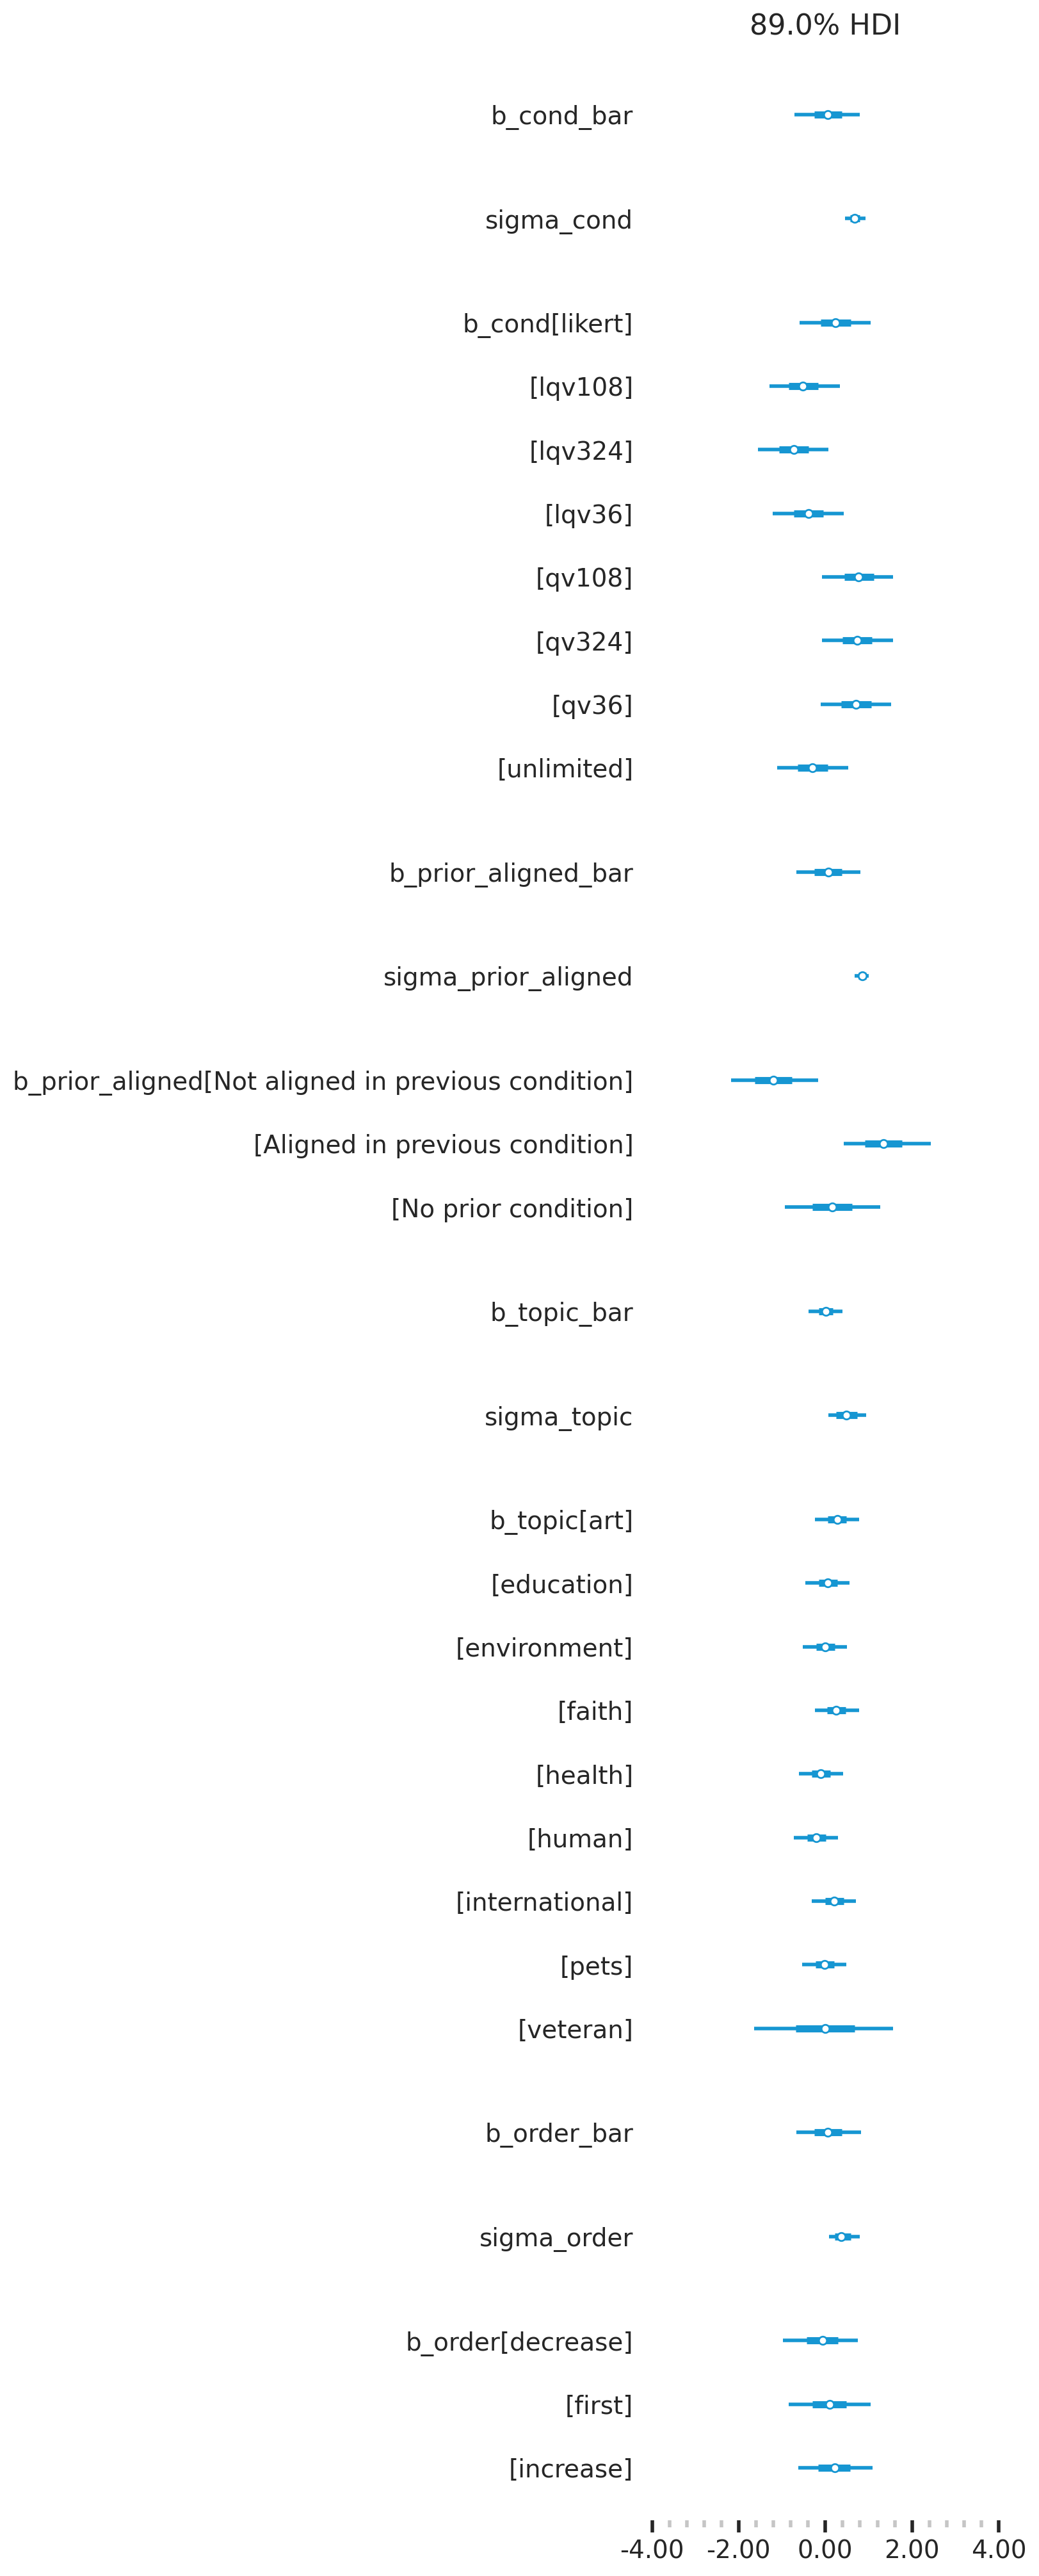

In [54]:
axs = az.plot_forest(data=model_data,
                     var_names=['b_cond_bar', 'sigma_cond', 'b_cond',
                                'b_prior_aligned_bar', 'sigma_prior_aligned', 'b_prior_aligned',
                                'b_topic_bar', 'sigma_topic', 'b_topic',
                                'b_order_bar', 'sigma_order', 'b_order',
                                ],
                     combined=True,
                     colors=base_color,
                     ridgeplot_alpha=0.3,
                     linewidth=2,
                     figsize=(8, 20))

z = axs[0]
# axs.set_title(Title, size=12)
# z.set_xlabel(r'$\mu$', fontsize=18)  # no individual labels
# z.set_ylabel("Density", fontsize=10)
z.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# z.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
z.spines['right'].set_visible(False)
z.spines['top'].set_visible(False)
z.spines['left'].set_visible(False)
z.spines['bottom'].set_visible(False)
z.spines['bottom'].set_position(('outward', 10))
z.xaxis.set_minor_locator(AutoMinorLocator(5))
z.set_xlim(left=-4, right=4)
z.tick_params(which='both', width=2)
z.tick_params(which='major', length=7)
z.tick_params(which='minor', length=4, color=neutral_gray)

# plt.subplots_adjust(hspace=0.75, wspace=0.1)
# plt.savefig('plots/rater_rating_variation.pdf', transparent=False)
plt.show()

In [55]:
# Plot Nameing Mapping
plot_name_mapping = {
    'Likert': 'Likert',
    'Unlimited QV Vote': 'UQS Vote'    ,
    'Unlimited QV Credit': 'UQS Credit',
    'UnlimitedQV': 'UQS',
    'QV36': 'QS36',
    'QV108': 'QS108',
    'QV324': 'QS324',
    'QV': 'Overall QS Vote',
    'QV36 Credit': 'QS36 Credit',
    'QV108 Credit': 'QS108 Credit',
    'QV324 Credit': 'QS324 Credit'  ,
    'QV Credit': 'Overall QS Credit',
    'CS36': 'LS18 Vote',
    'CS108': 'LS54 Vote',
    'CS324': 'LS162 Vote',
    'Constant Sum': 'Overall LS Vote'
}

/tmp/ipykernel_30739/3908710456.py:96: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.75, wspace=0.1)
/tmp/ipykernel_30739/3908710456.py:97: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


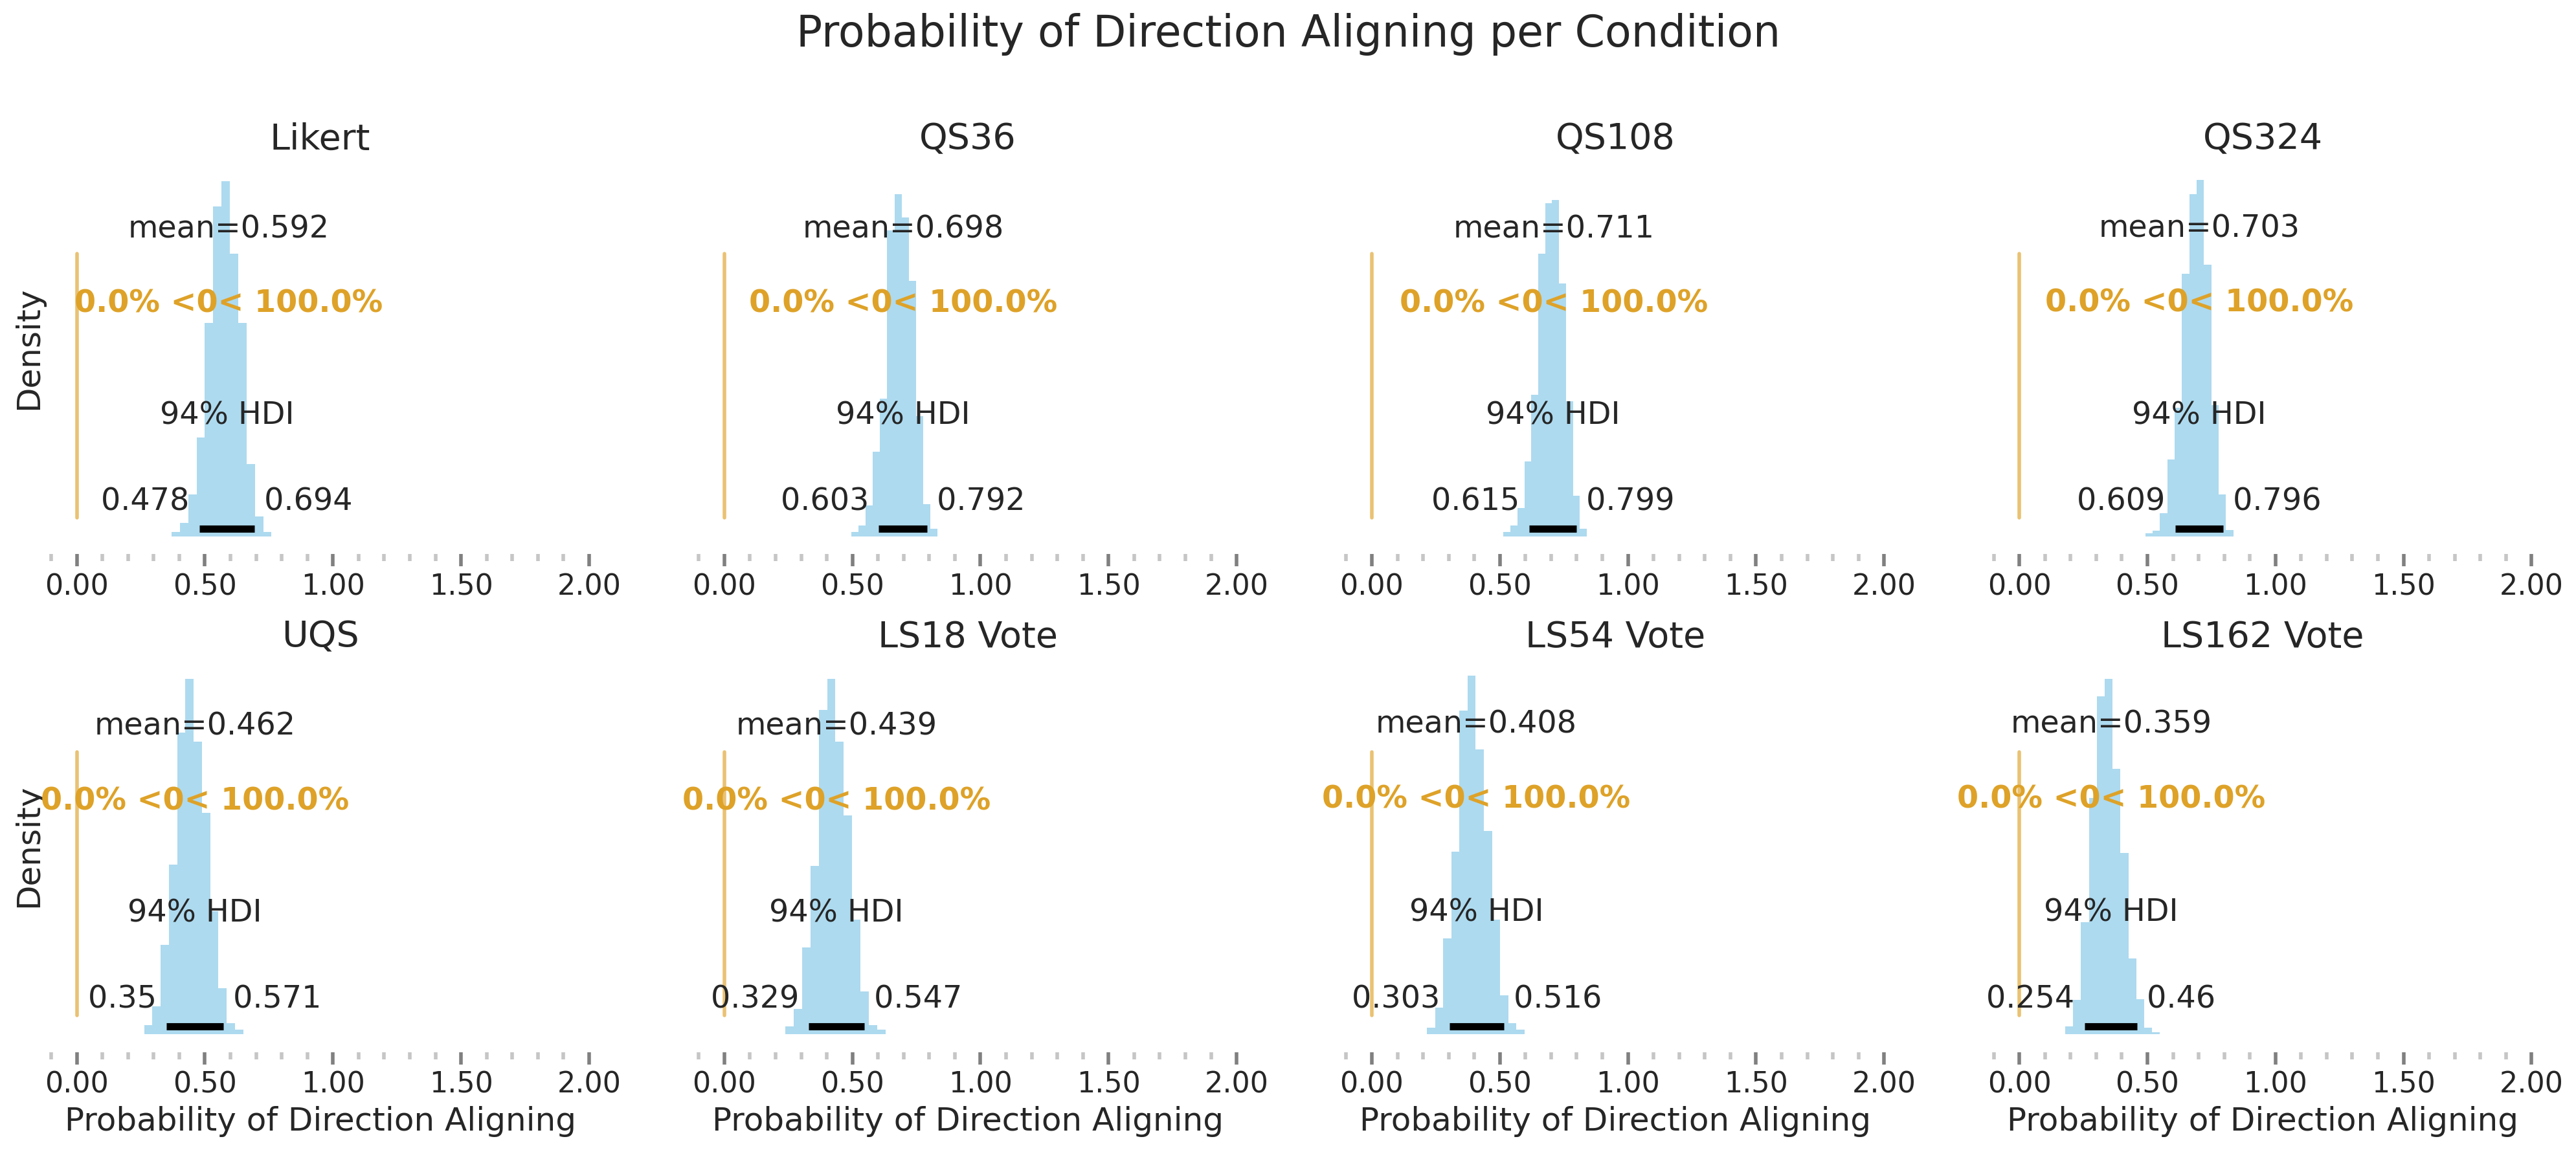

In [56]:
import scipy
from matplotlib.ticker import FormatStrFormatter, AutoMinorLocator

condition_data = model_data.posterior['b_cond'].mean(("chain"))

likert = condition_data.sel(conditions='likert').values
qv36 = condition_data.sel(conditions='qv36').values
qv108 = condition_data.sel(conditions='qv108').values
qv324 = condition_data.sel(conditions='qv324').values
lqv36 = condition_data.sel(conditions='lqv36').values
lqv108 = condition_data.sel(conditions='lqv108').values
lqv324 = condition_data.sel(conditions='lqv324').values
unlimited = condition_data.sel(conditions='unlimited').values

order_data = model_data.posterior['b_order_bar'].mean(("chain"))
topic_data = model_data.posterior['b_topic_bar'].mean(("chain"))
prior_alignment_data = model_data.posterior['b_prior_aligned_bar'].mean(("chain"))

sum_except_cond = topic_data * 2 + order_data + prior_alignment_data

pred_probs = [
    scipy.special.expit(likert + sum_except_cond),
    scipy.special.expit(qv36 + sum_except_cond),
    scipy.special.expit(qv108 + sum_except_cond),
    scipy.special.expit(qv324 + sum_except_cond),
    scipy.special.expit(unlimited + sum_except_cond),
    scipy.special.expit(lqv36 + sum_except_cond),
    scipy.special.expit(lqv108 + sum_except_cond),
    scipy.special.expit(lqv324 + sum_except_cond),
]


titles = [
    'Likert',
    'QV36',
    'QV108',
    'QV324',
    'UnlimitedQV',
    'CS36',
    'CS108',
    'CS324',
]

row = 2
col = 4
subplot_positions = []

for r in range(row):
  for c in range(col):
    subplot_pos = (r, c)
    subplot_positions.append(subplot_pos)


fig, axes = plt.subplots(row, col, figsize=(20, 9), sharex=True, sharey=True)

for contr, title, subplot_position in zip(pred_probs, titles, subplot_positions):

    z = axes[subplot_position]
    az.plot_posterior(
        contr,
        ax=z,
        textsize=16,
        ref_val=0.0,
        ref_val_color=yellow_color,
        lw=2,
#         alpha=0.3,
        color=base_color,
        hdi_prob=0.94, kind="hist",
#         rope=[0.95, 1.05],
        round_to=3,
#         rope_color=green_color
    )


    z.set_title(plot_name_mapping[title], size=20)
    if subplot_position[1] == 0:
        z.set_ylabel("Density", fontsize=18, position=('outward', -5))
    if subplot_position[0] == 1:
        z.set_xlabel('Probability of Direction Aligning', fontsize=18)
    z.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    z.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    z.spines['right'].set_visible(False)
    z.spines['top'].set_visible(False)
    z.spines['left'].set_visible(False)
    z.spines['bottom'].set_visible(False)
    z.spines['bottom'].set_position(('outward', 10))
    z.xaxis.set_minor_locator(AutoMinorLocator(5))
#     if subplot_position == (1,1):
    z.set_xlim(left=-0.1, right=2)
    z.tick_params(which='both', width=2)
    z.tick_params(which='major', length=7)
    z.tick_params(which='minor', length=4, color=neutral_gray)

plt.suptitle("Probability of Direction Aligning per Condition\n", size=24)

plt.subplots_adjust(hspace=0.75, wspace=0.1)
plt.tight_layout()

Title = 'ranking_output'
filename = os.path.join(OUTPUT_PATH, Title + '.pdf')
plt.savefig(filename, transparent=False, bbox_inches="tight")
plt.show()

In [57]:
blue_palatte = sns.color_palette("Blues", 12)
orange_palette = sns.color_palette("Oranges", 8)
red_palette = sns.color_palette("Reds", 8)
purple_palette = sns.color_palette("Purples", 8)

colors = {
    "Likert": "#000000",
    "QS36": blue_palatte[4],
    "QS108": blue_palatte[6],
    "QS324": blue_palatte[8],
    "qv36_c": blue_palatte[7],
    "qv108_c": blue_palatte[8],
    "qv324_c": blue_palatte[9],
    "LS18 Vote": red_palette[2],
    "LS54 Vote": red_palette[3],
    "LS162 Vote": red_palette[4],
    "unlimited": purple_palette[5],
    "unlimited_c": purple_palette[7],
    'Likert': "#000000",
    'UQS': purple_palette[5],
    'Unlimited QS Credit': purple_palette[7],
    'QS Vote': blue_palatte[5],
    'QS Credit': blue_palatte[11],
    'LS': red_palette[3]
}

colors

{'Likert': '#000000',
 'QS36': (0.6047058823529413, 0.7839753940792004, 0.8791387927720108),
 'QS108': (0.37168781237985393, 0.6496270665128797, 0.8205151864667436),
 'QS324': (0.18726643598615916, 0.5009919261822375, 0.7396078431372549),
 'qv36_c': (0.27080353710111493, 0.5807304882737409, 0.7811457131872357),
 'qv108_c': (0.18726643598615916, 0.5009919261822375, 0.7396078431372549),
 'qv324_c': (0.11480199923106507, 0.42443675509419465, 0.6951941560938102),
 'LS18 Vote': (0.9882352941176471, 0.6261437908496732, 0.5084967320261438),
 'LS54 Vote': (0.9860976547481738, 0.48704344482891193, 0.3615532487504806),
 'LS162 Vote': (0.9629065743944636, 0.331841599384852, 0.23667820069204154),
 'unlimited': (0.47320261437908495, 0.43267973856209146, 0.6993464052287581),
 'unlimited_c': (0.3194002306805075, 0.13434832756632065, 0.5522029988465975),
 'UQS': (0.47320261437908495, 0.43267973856209146, 0.6993464052287581),
 'Unlimited QS Credit': (0.3194002306805075,
  0.13434832756632065,
  0.55220

In [58]:
titles

['Likert', 'QV36', 'QV108', 'QV324', 'UnlimitedQV', 'CS36', 'CS108', 'CS324']

/tmp/ipykernel_30739/4116662168.py:27: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


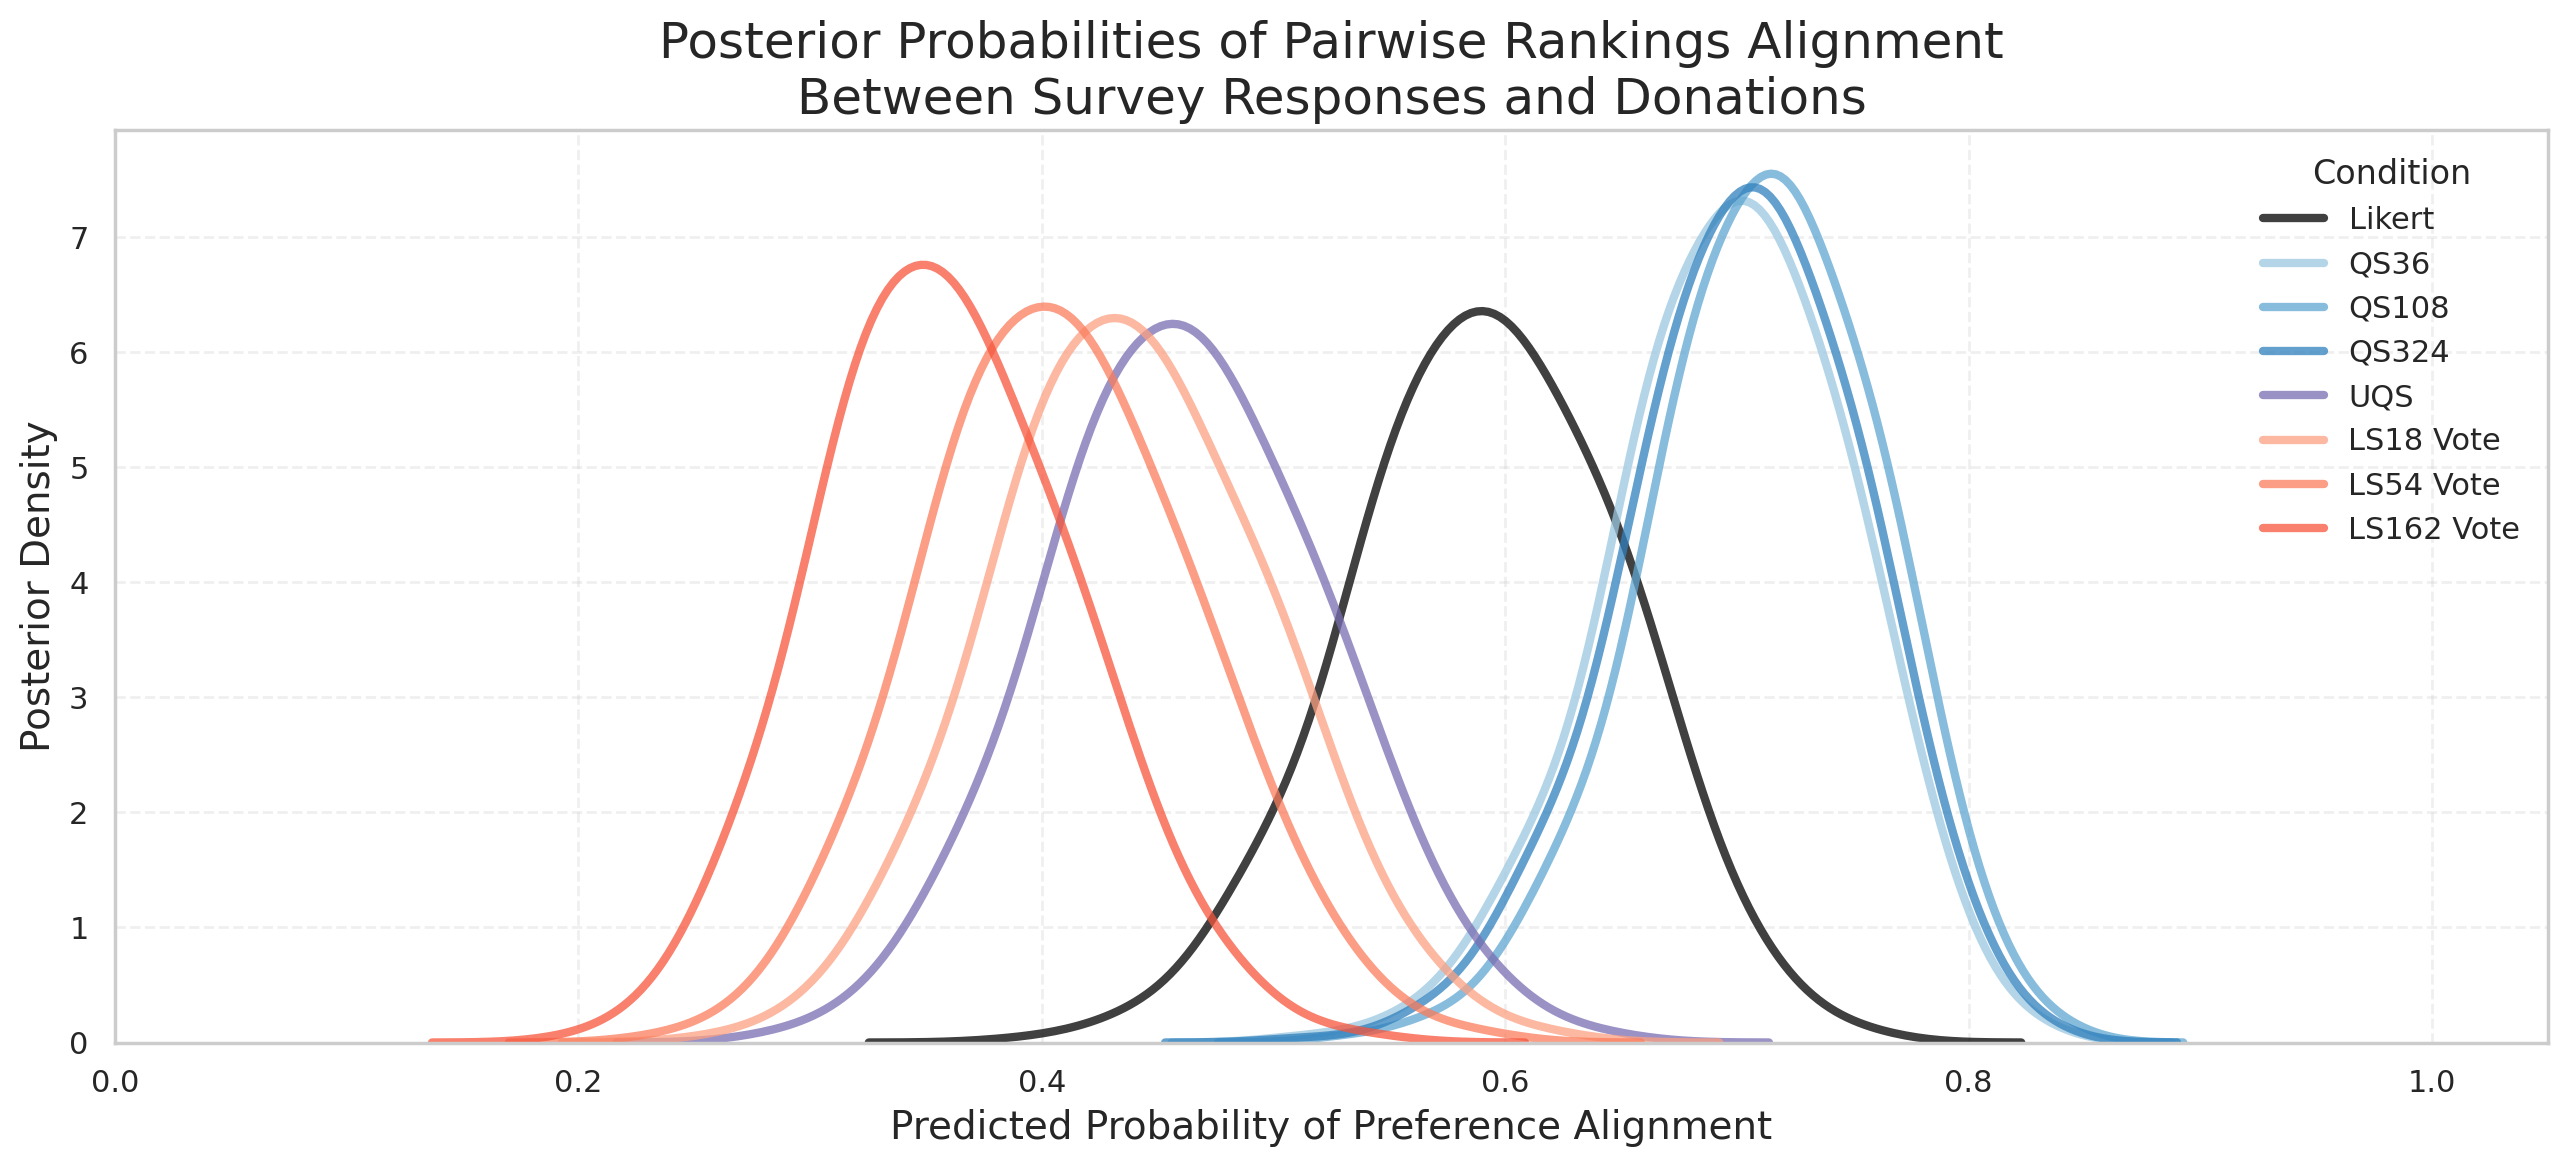

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 6))
sns.set_theme(style="whitegrid")

# Use your custom mapping to determine the right label and color
for i, (pp, label_key) in enumerate(zip(pred_probs, titles)):
    label = plot_name_mapping[label_key]  # e.g., 'QS Vote', 'Likert', etc.
    color = colors.get(label, "#333333")  # fallback color if label not in dict
    sns.kdeplot(
        pp,
        label=label,
        lw=3,
        # linestyle='-',
        color=color,
        bw_adjust=1.5,
        alpha=0.75,
        # linestyle = '-' if 'QS' in label else '--' if 'LS' in label else '-.'
    )

plt.title("Posterior Probabilities of Pairwise Rankings Alignment\nBetween Survey Responses and Donations", fontsize=18)
plt.xlabel("Predicted Probability of Preference Alignment", fontsize=14)
plt.ylabel("Posterior Density", fontsize=14)
plt.legend(title="Condition", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.xlim(0, 1.05)
# plt.ylim(0,1)

# Save or display
plt.savefig(os.path.join(OUTPUT_PATH, "overlapping_density_custom_palette.pdf"), bbox_inches="tight")
plt.show()


/tmp/ipykernel_30739/3973246887.py:75: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.75, wspace=0.1)
/tmp/ipykernel_30739/3973246887.py:76: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


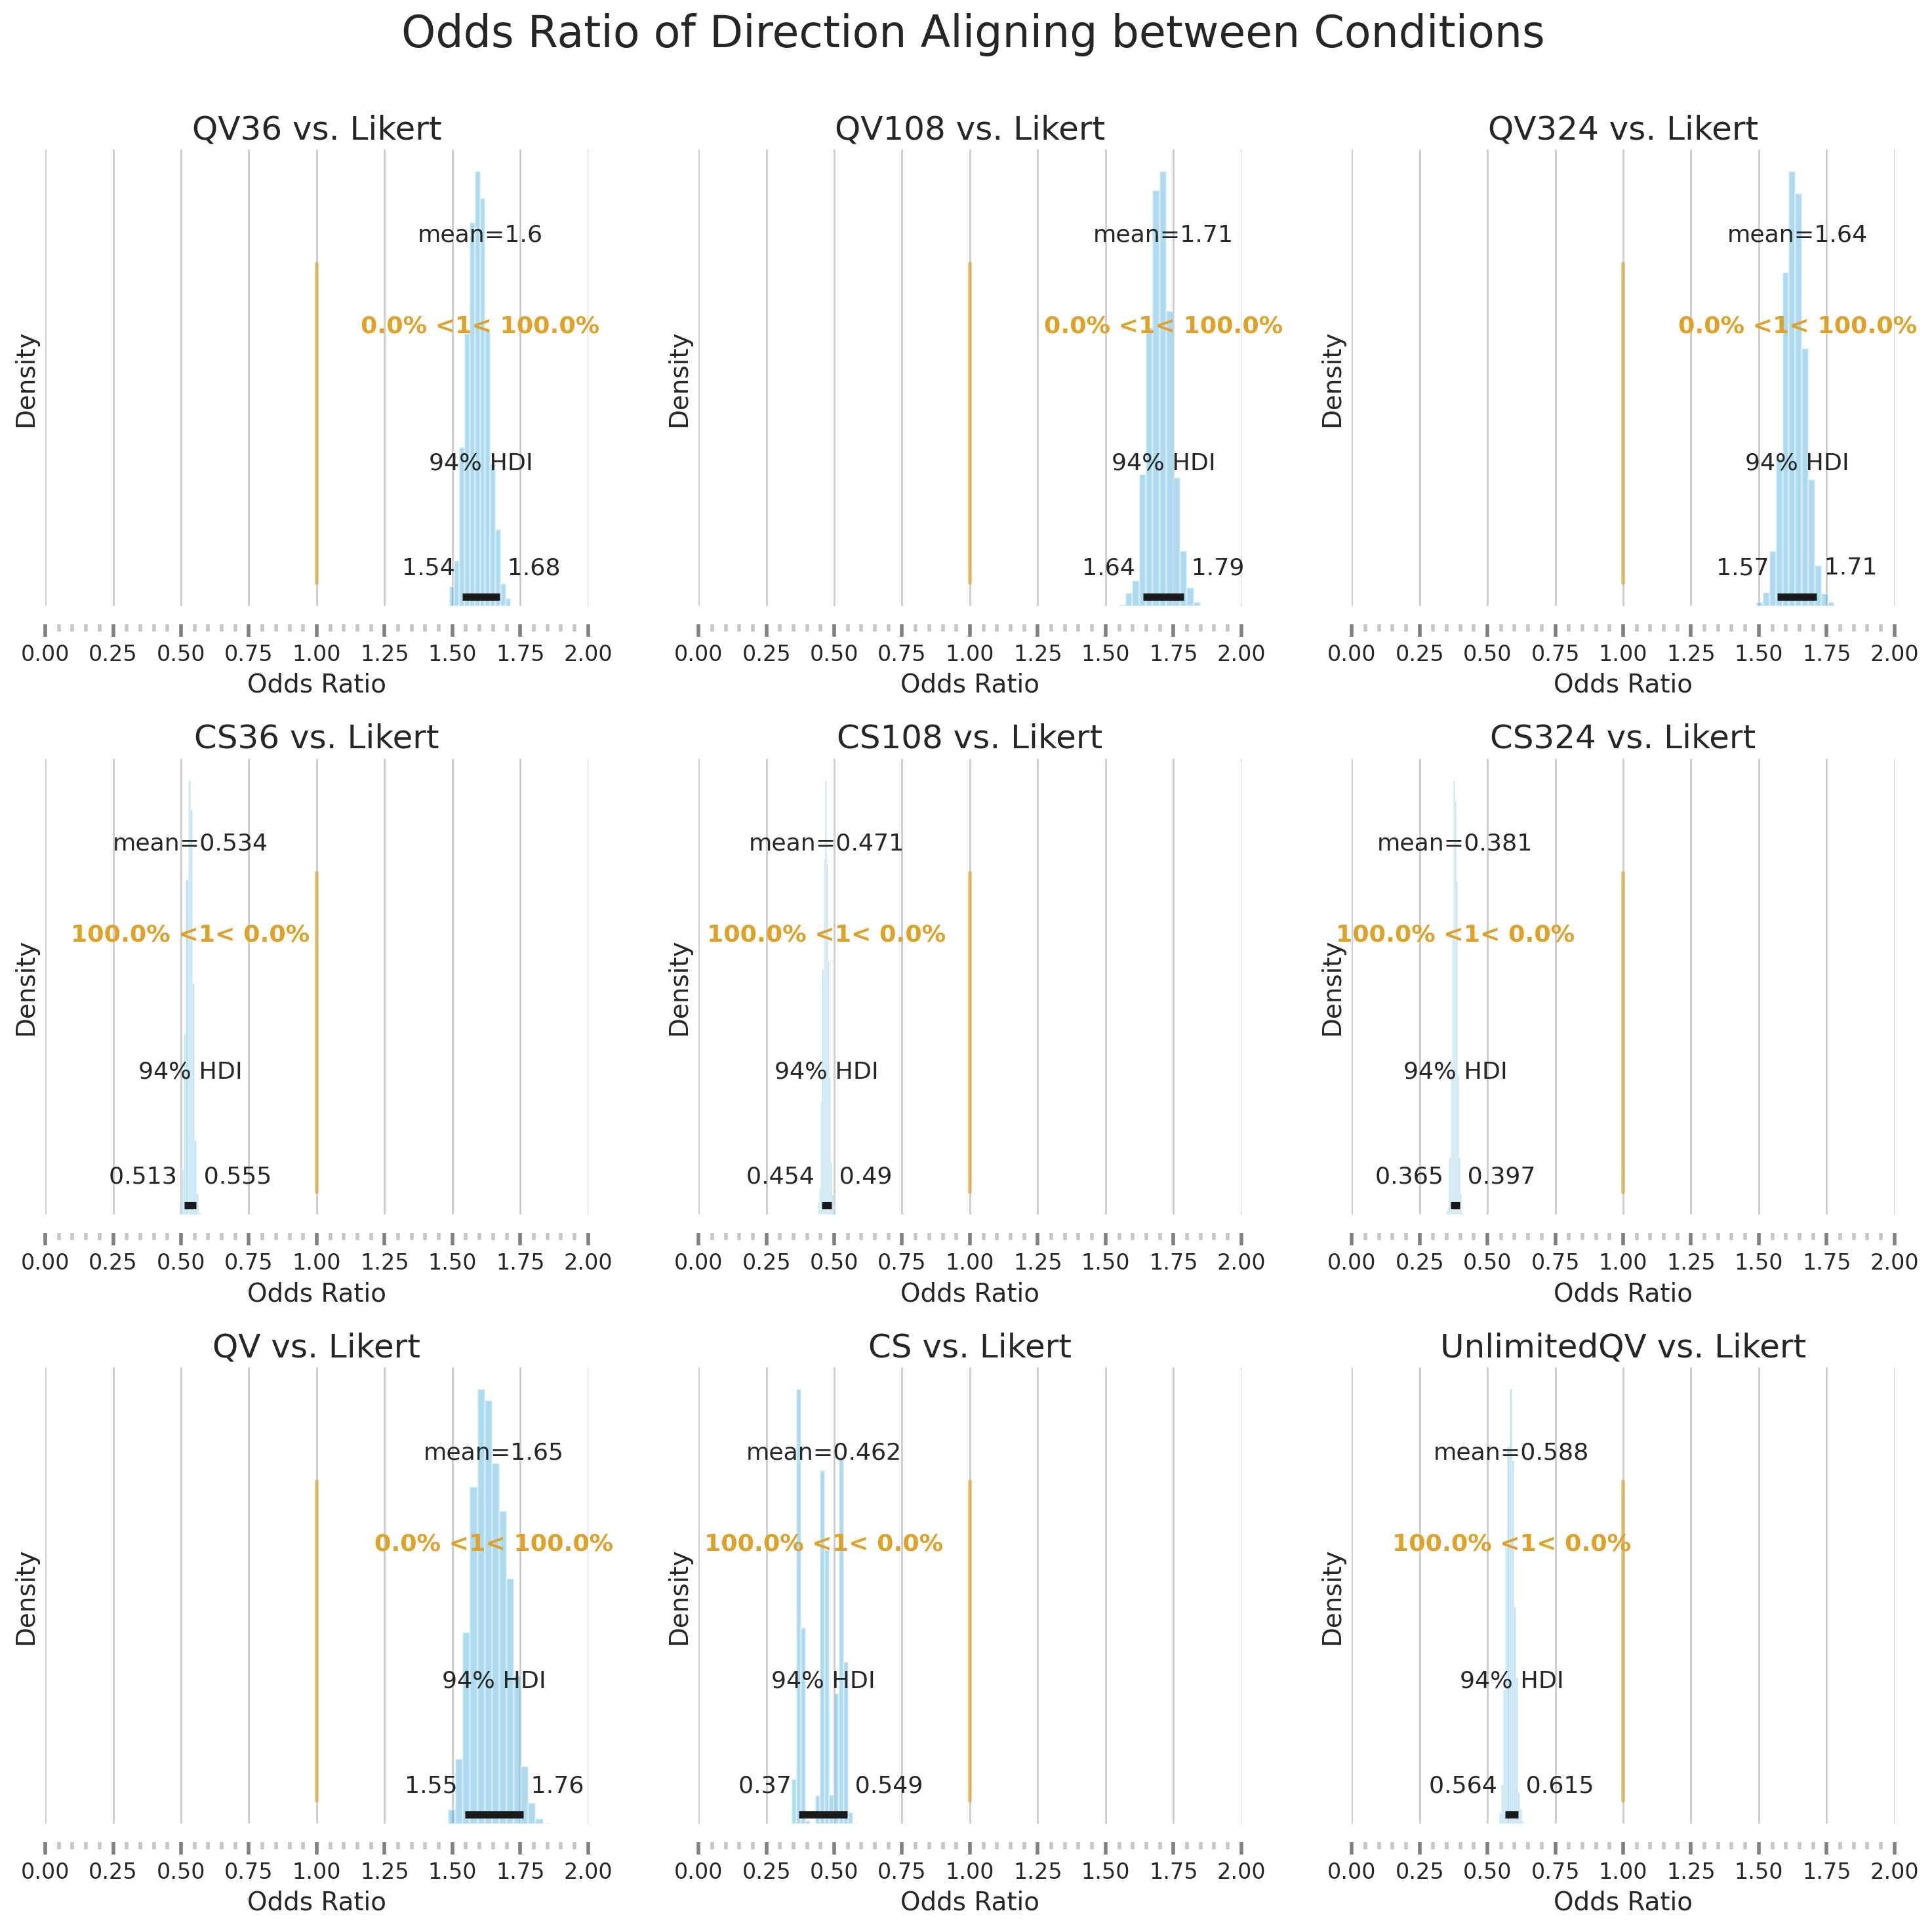

In [60]:
contrasts = [
    np.exp(qv36 - likert),
    np.exp(qv108 - likert),
    np.exp(qv324 - likert),
    np.exp(lqv36 - likert),
    np.exp(lqv108 - likert),
    np.exp(lqv324 - likert),
    np.concatenate([np.exp(qv36 - likert), np.exp(qv108 - likert), np.exp(qv324 - likert)]),
    np.concatenate([np.exp(lqv36 - likert), np.exp(lqv108 - likert), np.exp(lqv324 - likert)]),
    np.exp(unlimited - likert),
]

titles = [
    'QV36 vs. Likert',
    'QV108 vs. Likert',
    'QV324 vs. Likert',
    'CS36 vs. Likert',
    'CS108 vs. Likert',
    'CS324 vs. Likert',
    'QV vs. Likert',
    'CS vs. Likert',
    'UnlimitedQV vs. Likert',
]

row = 3
col = 3
subplot_positions = []

for r in range(row):
  for c in range(col):
    subplot_pos = (r, c)
    subplot_positions.append(subplot_pos)


fig, axes = plt.subplots(row, col, figsize=(15, 15))

for contr, title, subplot_position in zip(contrasts, titles, subplot_positions):

    z = axes[subplot_position]
    az.plot_posterior(
        contr,
        ax=z,
        textsize=12,
        ref_val=1.0,
        ref_val_color=yellow_color,
        lw=2,
#         alpha=0.3,
        color=base_color,
        hdi_prob=0.94, kind="hist",
#         rope=[0.95, 1.05],
        round_to=3,
#         rope_color=green_color
    )


    z.set_title(title, size=18)
    z.set_xlabel('Odds Ratio', fontsize=14)
    z.set_ylabel("Density", fontsize=14)
    z.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    z.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    z.spines['right'].set_visible(False)
    z.spines['top'].set_visible(False)
    z.spines['left'].set_visible(False)
    z.spines['bottom'].set_visible(False)
    z.spines['bottom'].set_position(('outward', 10))
    z.xaxis.set_minor_locator(AutoMinorLocator(5))
#     if subplot_position == (1,1):
    z.set_xlim(left=0, right=2)
    z.tick_params(which='both', width=2)
    z.tick_params(which='major', length=7)
    z.tick_params(which='minor', length=4, color=neutral_gray)

plt.suptitle("Odds Ratio of Direction Aligning between Conditions\n", size=24)

plt.subplots_adjust(hspace=0.75, wspace=0.1)
plt.tight_layout()

Title = 'Contrast_Against_Likert_Direction_Alignment_All_Conditions_Def1'
filename = os.path.join(OUTPUT_PATH, Title + '.pdf')
plt.savefig(filename, transparent=False, bbox_inches="tight")
plt.show()

/tmp/ipykernel_30739/3797297044.py:72: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.75, wspace=0.1)
/tmp/ipykernel_30739/3797297044.py:73: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


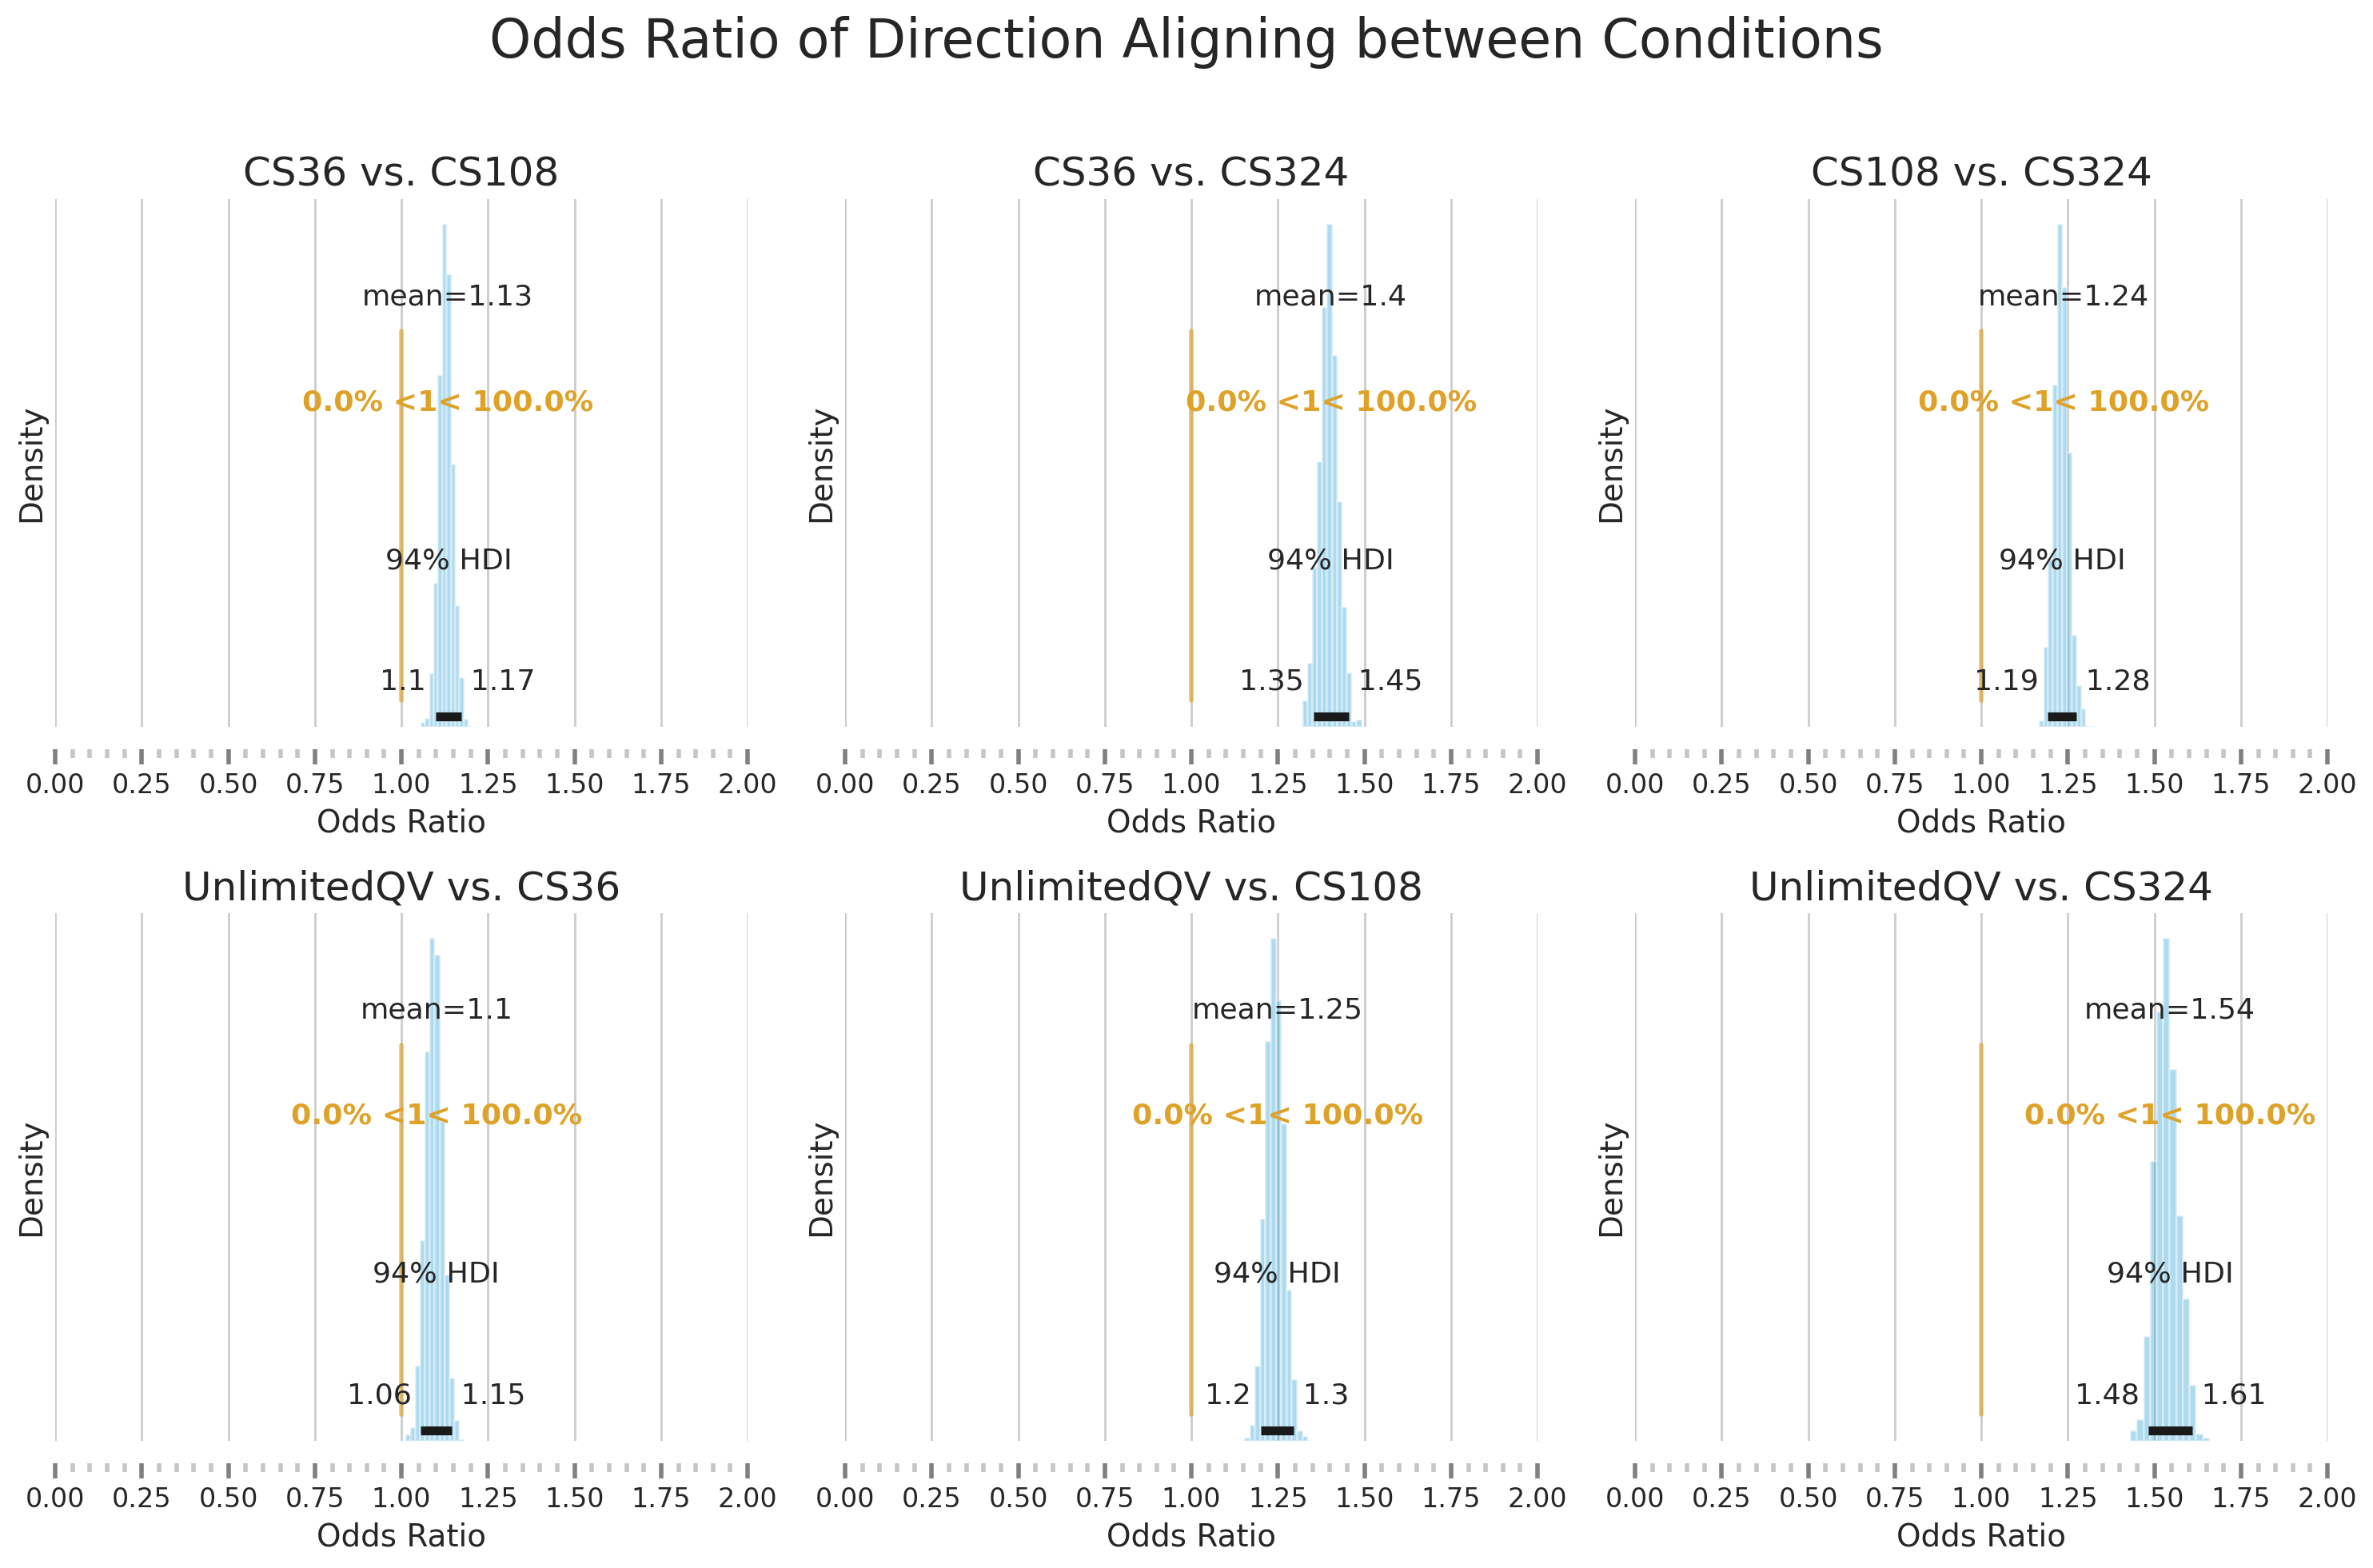

In [61]:
contrasts = [
    np.exp(lqv36 - lqv108),
    np.exp(lqv36 - lqv324),
    np.exp(lqv108 - lqv324),
    np.exp(unlimited - lqv36),
    np.exp(unlimited - lqv108),
    np.exp(unlimited - lqv324)
]

titles = [
    'CS36 vs. CS108',
    'CS36 vs. CS324',
    'CS108 vs. CS324',
    'UnlimitedQV vs. CS36',
    'UnlimitedQV vs. CS108',
    'UnlimitedQV vs. CS324',
]

row = 2
col = 3
subplot_positions = []

for r in range(row):
  for c in range(col):
    if row == 1:
      subplot_pos = (c,)
    else:
      subplot_pos = (r, c)
    subplot_positions.append(subplot_pos)


fig, axes = plt.subplots(row, col, figsize=(5*col, 5*row))

for contr, title, subplot_position in zip(contrasts, titles, subplot_positions):

    z = axes[subplot_position]
    az.plot_posterior(
        contr,
        ax=z,
        textsize=12,
        ref_val=1.0,
        ref_val_color=yellow_color,
        lw=2,
#         alpha=0.3,
        color=base_color,
        hdi_prob=0.94, kind="hist",
#         rope=[0.95, 1.05],
        round_to=3,
#         rope_color=green_color
    )


    z.set_title(title, size=18)
    z.set_xlabel('Odds Ratio', fontsize=14)
    z.set_ylabel("Density", fontsize=14)
    z.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    z.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    z.spines['right'].set_visible(False)
    z.spines['top'].set_visible(False)
    z.spines['left'].set_visible(False)
    z.spines['bottom'].set_visible(False)
    z.spines['bottom'].set_position(('outward', 10))
    z.xaxis.set_minor_locator(AutoMinorLocator(5))
#     if subplot_position == (1,1):
    z.set_xlim(left=0, right=2)
    z.tick_params(which='both', width=2)
    z.tick_params(which='major', length=7)
    z.tick_params(which='minor', length=4, color=neutral_gray)

plt.suptitle("Odds Ratio of Direction Aligning between Conditions\n", size=24)

plt.subplots_adjust(hspace=0.75, wspace=0.1)
plt.tight_layout()

Title = 'Contrast_Within_CS_Direction_Alignment_Def1'
filename = os.path.join(OUTPUT_PATH, Title + '.pdf')
plt.savefig(filename, transparent=False, bbox_inches="tight")
plt.show()